In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc, cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

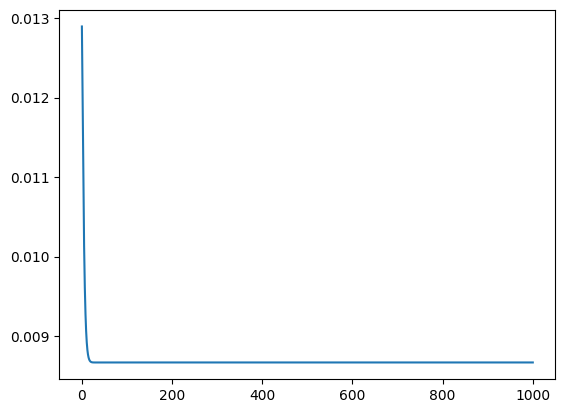

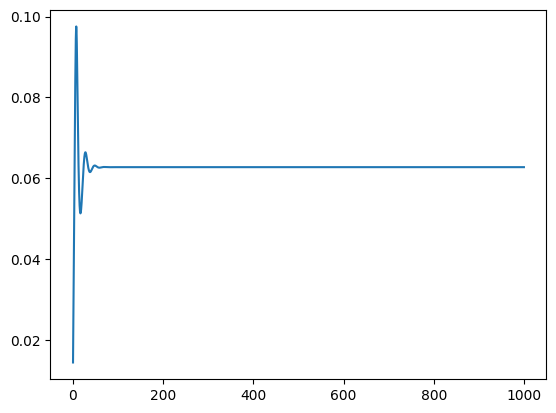

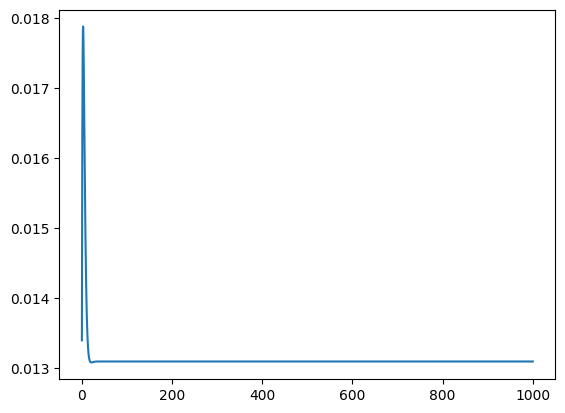

In [3]:
comp_points = [[0., 0.5], [1., 0.5], [0.5, 1.]]

N = 1
colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

model = WCModel()

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 1000 # Simulation time, ms
model.params.signalV = 1.

for p in comp_points:
    model.params["exc_ext"] = p[0]
    model.params["inh_ext"] = p[1]
    model.run()

    plt.plot(model.t, model.exc[0,:], color=colors[0])
    plt.show()


In [4]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

duration = 200.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

target_array = [10., 16.]

results = dict()
results["control"] = [ [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
]
results["state"] = [   [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
]

In [5]:

w2_array_A = [1e-7, 1e-6, 1e-5, 1e-4, 2*1e-4, 3*1e-4, 3.1*1e-4, 3.2*1e-4, 3.3*1e-4, 3.4*1e-4, 3.5*1e-4, 3.6*1e-4, 3.7*1e-4, 3.8*1e-4]
w2_array_A_1 = [1e-7, 1e-6, 1e-5, 1e-4, 4*1e-4, 5*1e-4, 6*1e-4, 7*1e-4]

w2_array_B = [1e-7, 1e-6, 1e-5, 1e-4, 5.*1e-4, 1e-3, 2*1e-3, 1e-2, 2*1e-2, 3*1e-2]
w2_array_B_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 5*1e-3, 6*1e-3, 7*1e-3, 8*1e-3, 9*1e-3, 1e-2, 2*1e-2, 3*1e-2, 4*1e-2]

w2_array_C = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

w2_array = [[w2_array_A, w2_array_A_1], [w2_array_B, w2_array_B_1], w2_array_C]

In [358]:
for k in range(5,14):
    results["control"][1][1][k] = None

In [10]:
it = 100
maxstr = 20

pr = np.arange(0,1001,50)
init_control = zero_control.copy()
dir = "images_1n_down"

pind =  0
itar =  0
iw =  0 1e-07
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.21381593189653136
Cost in iteration 50: -0.21382109814110353
Converged in iteration 55 with cost -0.21382109814110428
Final cost : -0.21382109814110428


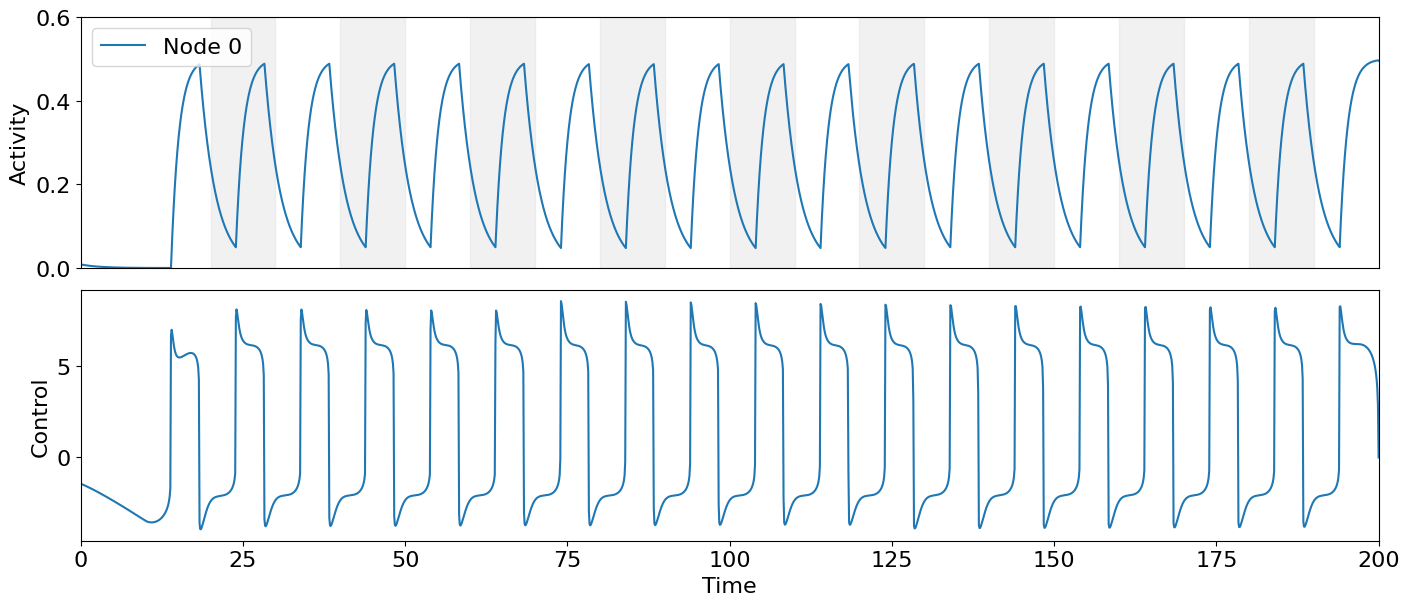

iw =  1 1e-06
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2125442961352985
Cost in iteration 50: -0.21255644014539732
Converged in iteration 56 with cost -0.212556440145401
Final cost : -0.212556440145401


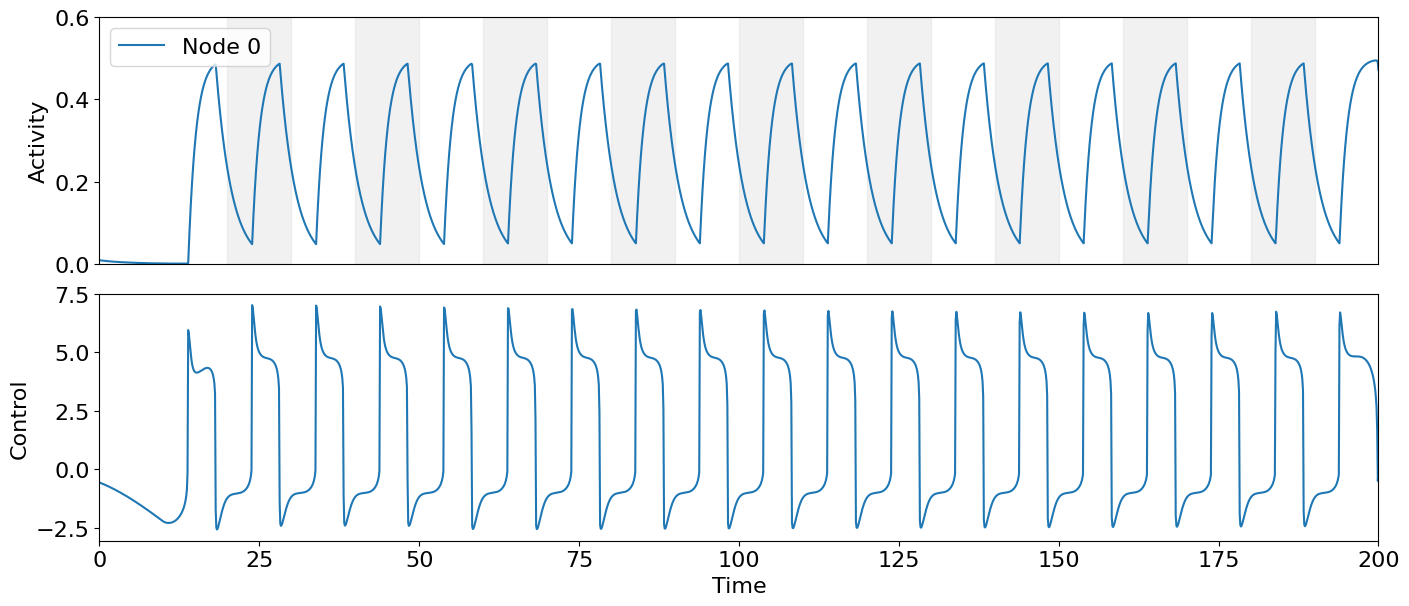

iw =  2 1e-05
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20549956870356906
Cost in iteration 50: -0.20558581999899786
Cost in iteration 100: -0.20560209136503724
Final cost : -0.20560209136503724


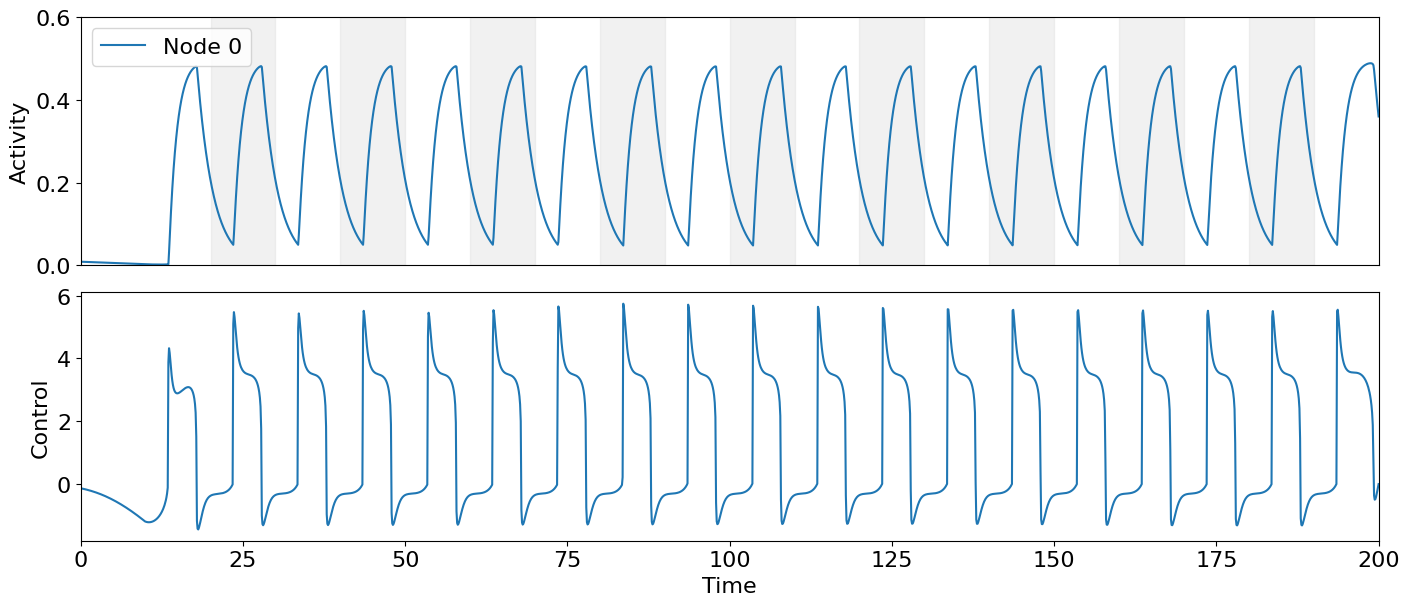

iw =  3 0.0001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.16922577331411068
Cost in iteration 50: -0.169582752389589
Converged in iteration 70 with cost -0.16958275238967077
Final cost : -0.16958275238967077


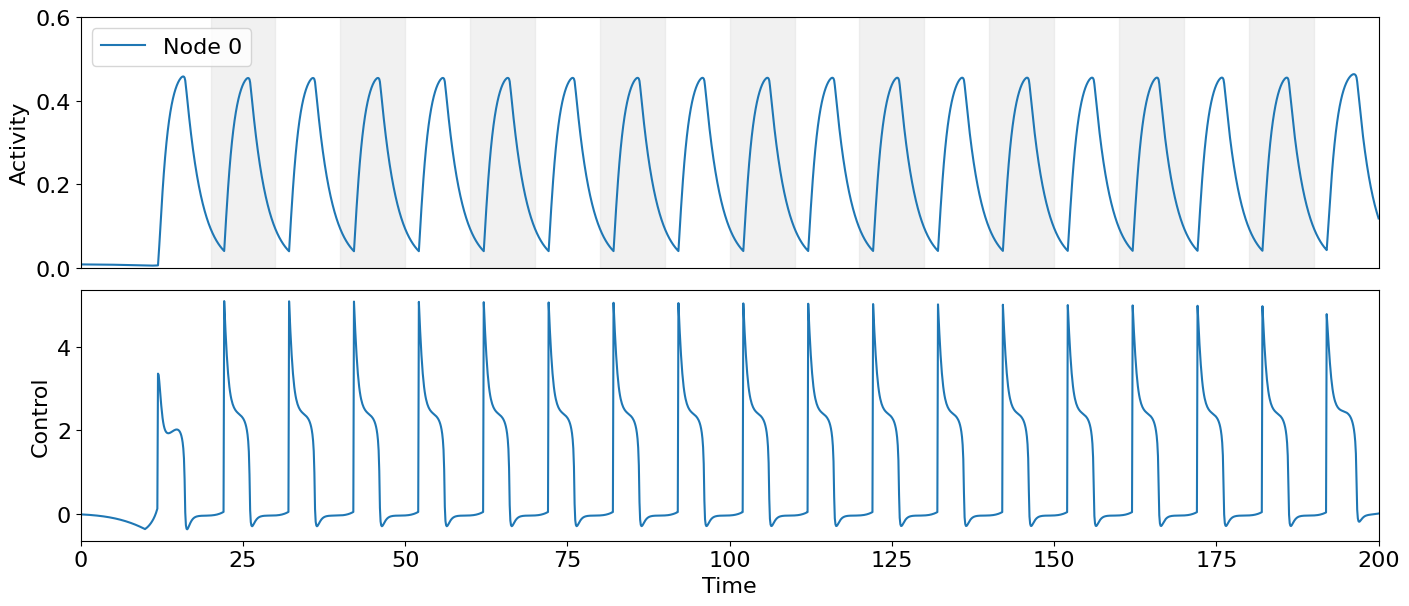

iw =  4 0.0002
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.1428957701157238
Cost in iteration 50: -0.14407734070452874
Cost in iteration 100: -0.1440773407388441
Final cost : -0.1440773407388441


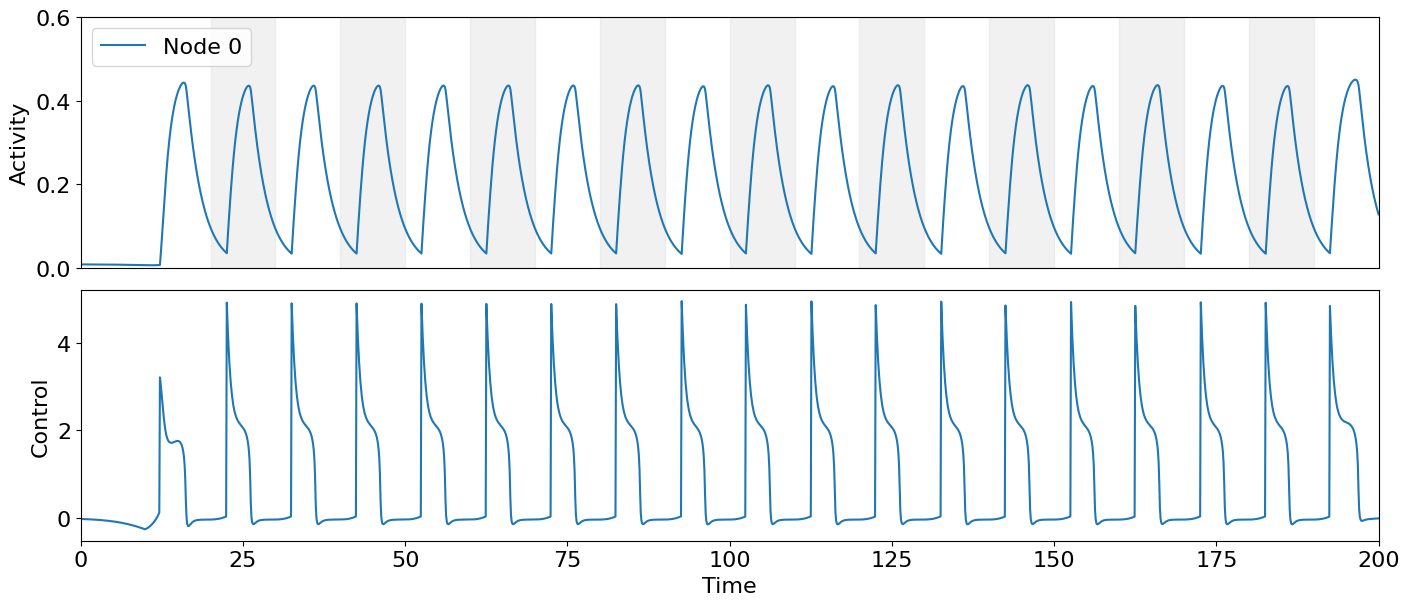

iw =  5 0.00030000000000000003
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.12168918666652104
Cost in iteration 50: -0.12293155559917032
Cost in iteration 100: -0.12293155574549314
Final cost : -0.12293155574549314


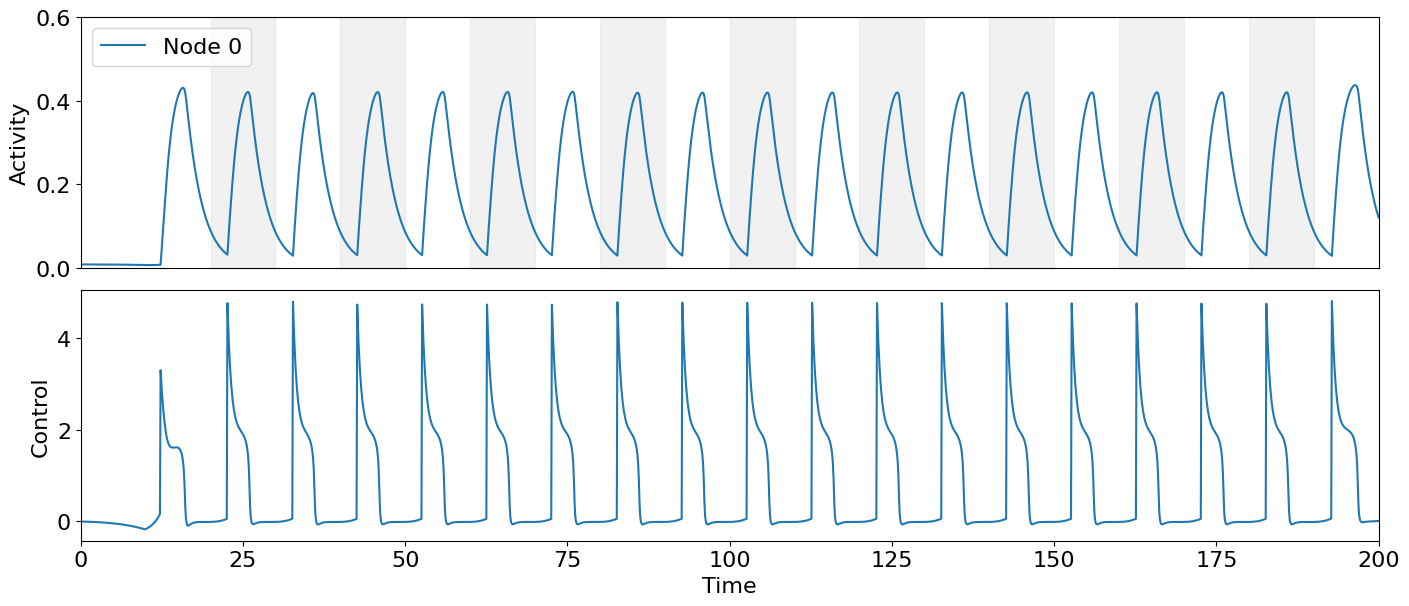

iw =  6 0.00031
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11993056073242708
Cost in iteration 50: -0.12103232264417942
Cost in iteration 100: -0.12103232313606566
Final cost : -0.12103232313606566


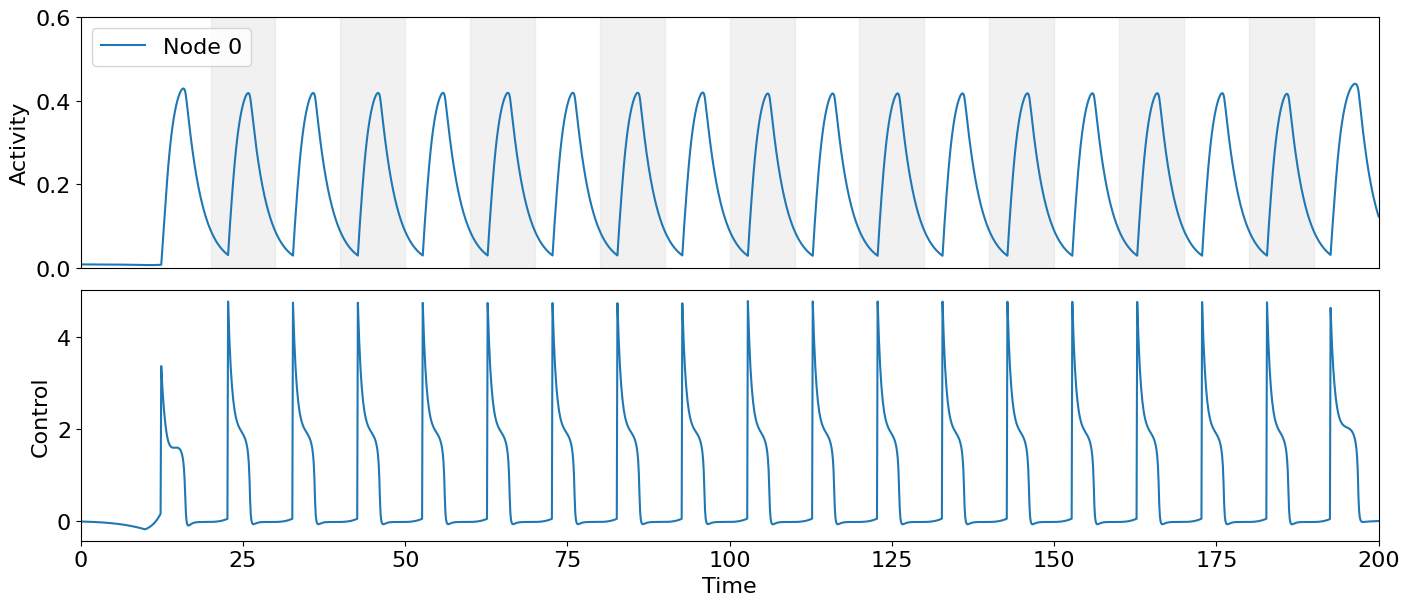

iw =  7 0.00032
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11765648902765727
Cost in iteration 50: -0.11912172829795806
Cost in iteration 100: -0.11912172910113794
Final cost : -0.11912172910113794


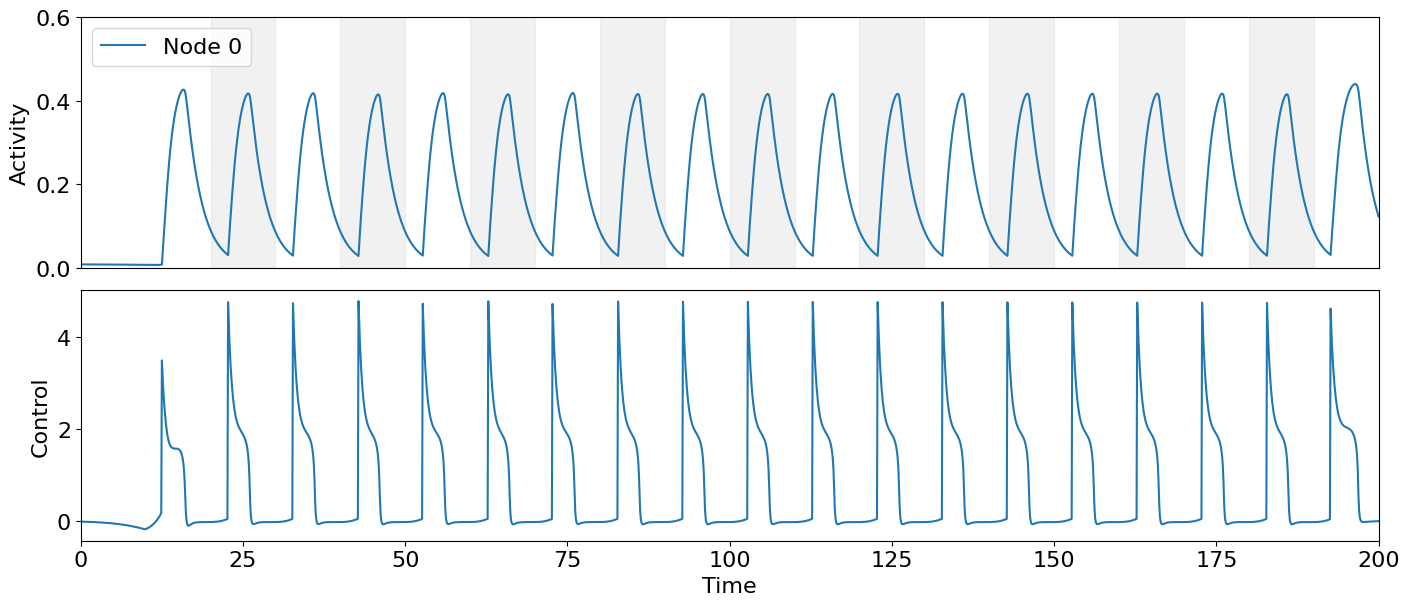

iw =  8 0.00033
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11556706353593516
Cost in iteration 50: -0.1172419624547951
Cost in iteration 100: -0.11724196911621629
Final cost : -0.11724196911621629


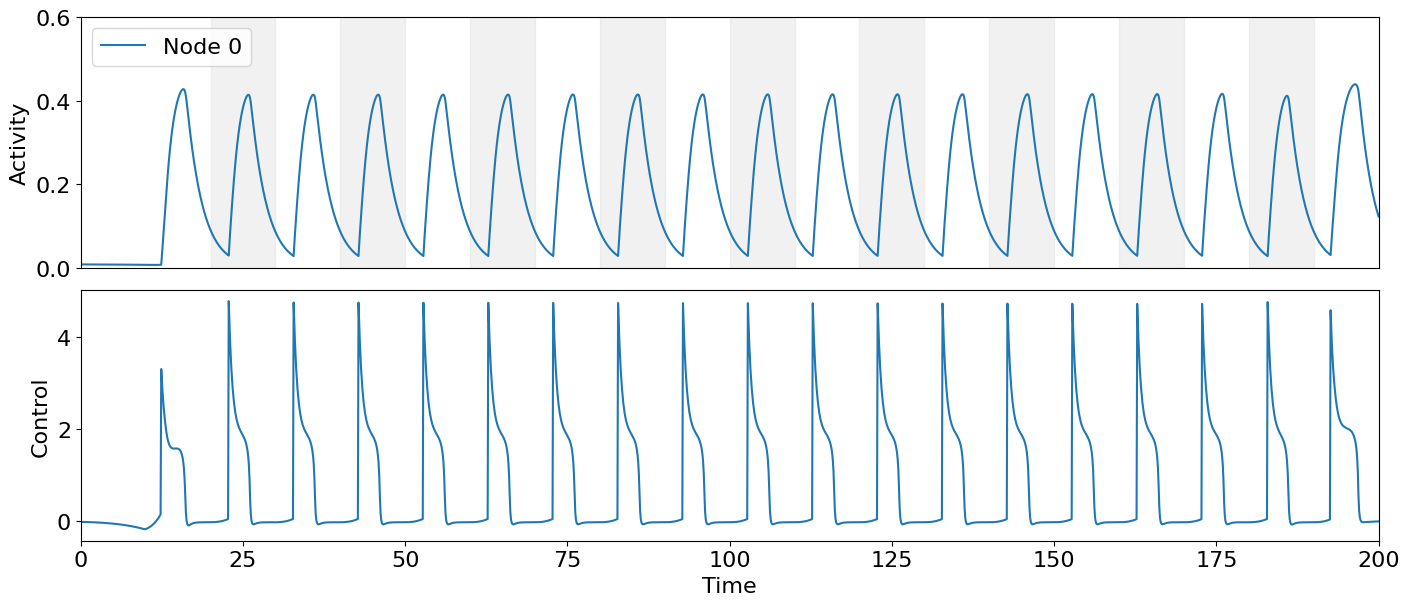

iw =  9 0.00034
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11399571234349334
Cost in iteration 50: -0.11531195642963128
Cost in iteration 100: -0.1153119569406089
Final cost : -0.1153119569406089


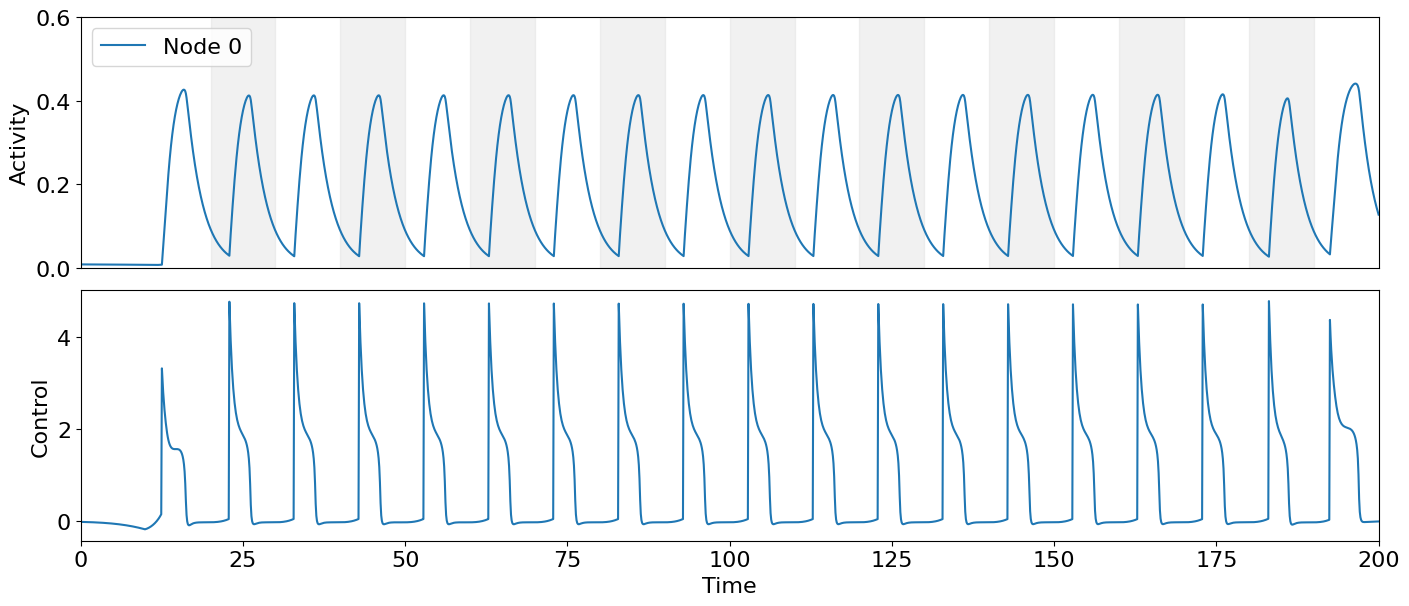

iw =  10 0.00035
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.10859533616337717
Cost in iteration 50: -0.10978691109750333
Cost in iteration 100: -0.10978691325448202
Final cost : -0.10978691325448202


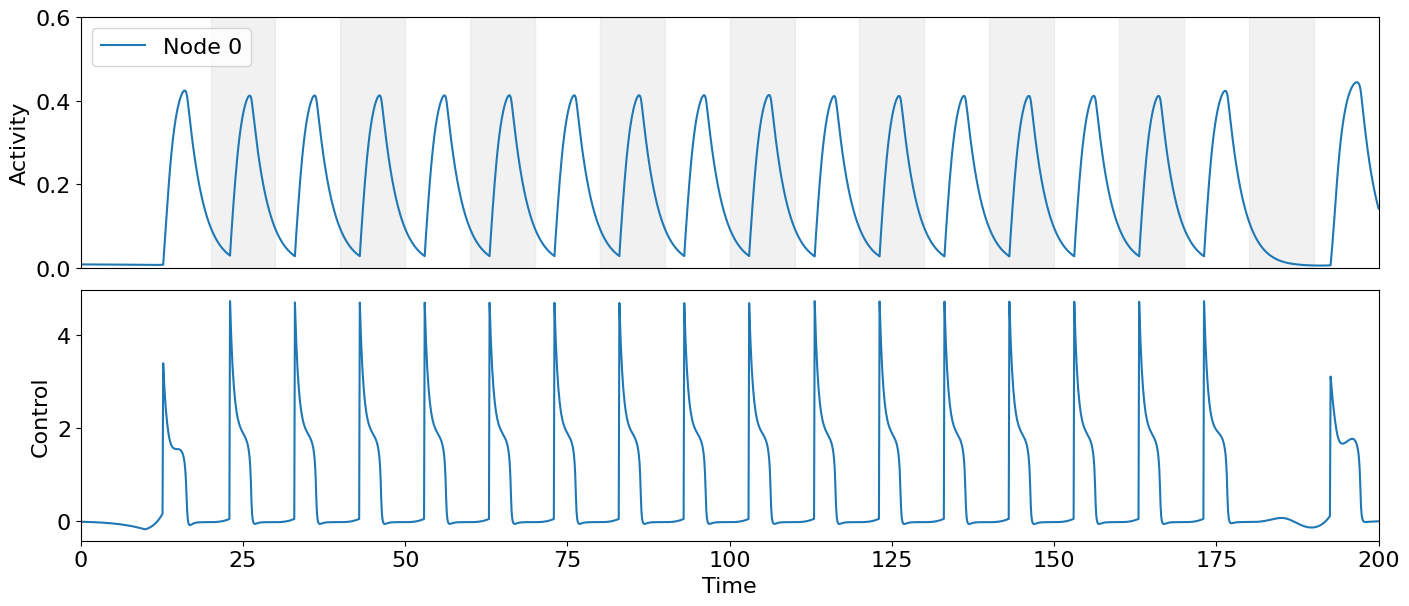

iw =  11 0.00036
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.10016320941269766
Cost in iteration 50: -0.1032177044634641
Cost in iteration 100: -0.10321771011258361
Final cost : -0.10321771011258361


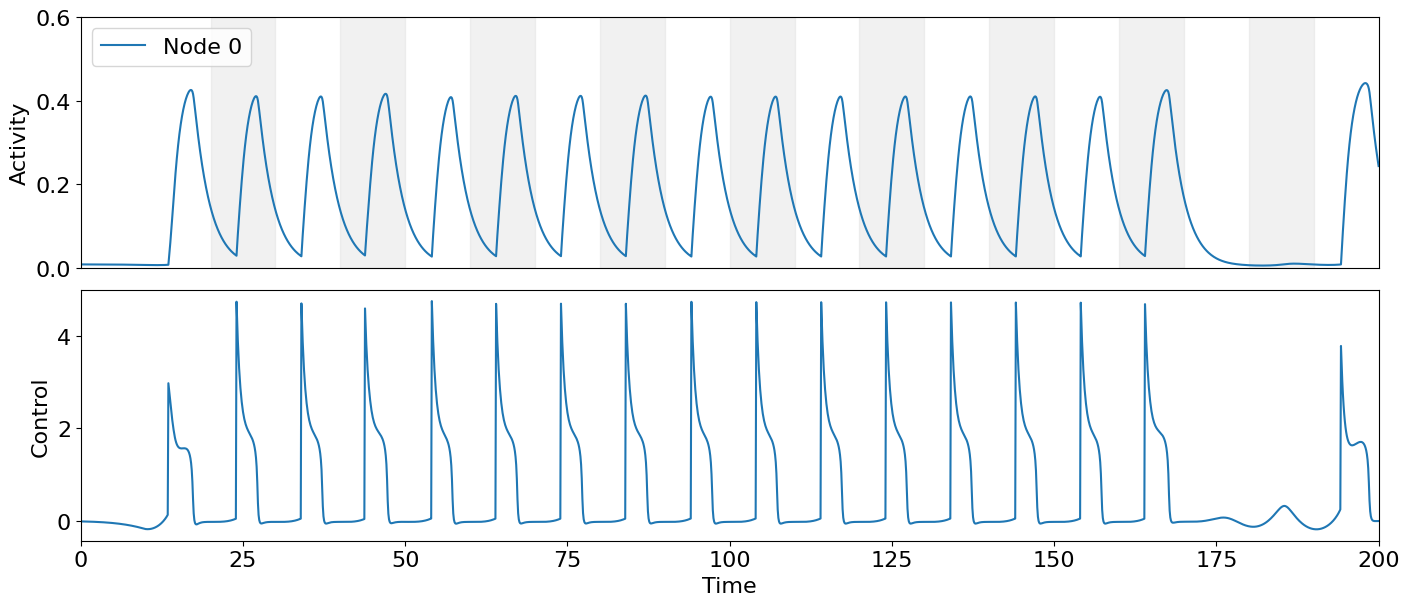

iw =  12 0.00037000000000000005
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.01815233159507667
Converged in iteration 2 with cost -0.01815233159507667
Final cost : -0.01815233159507667


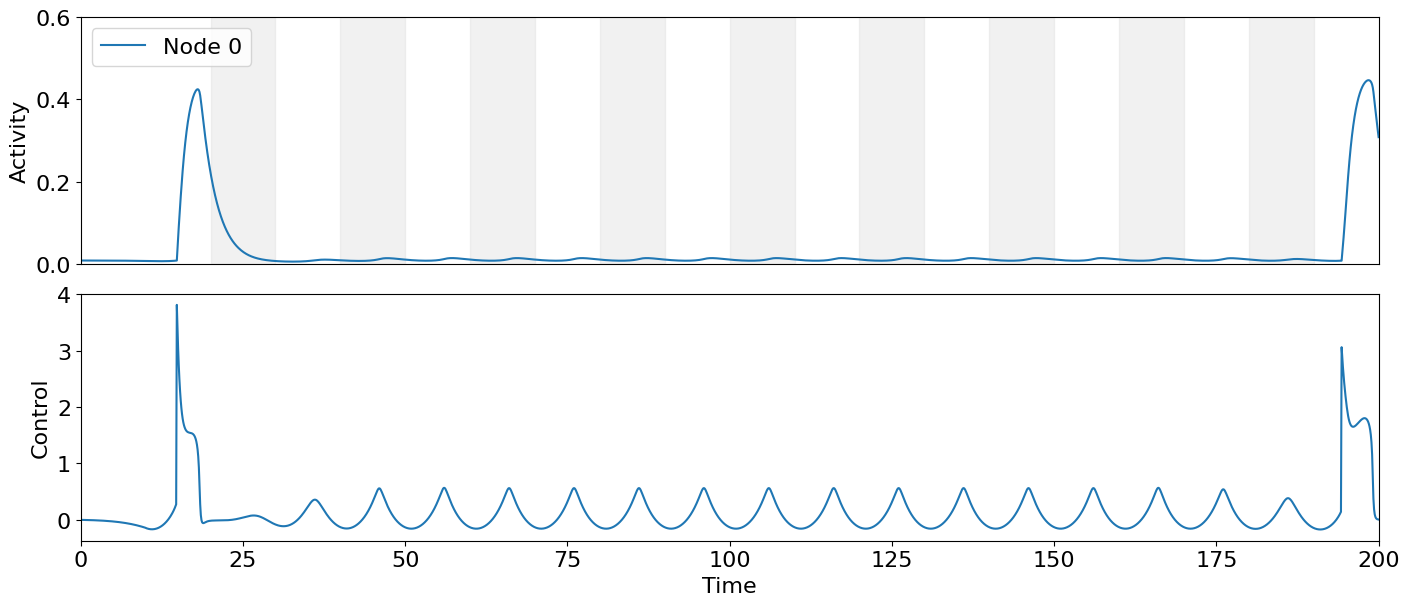

iw =  13 0.00038
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.010844665913830253
Converged in iteration 2 with cost -0.010844665913830253
Final cost : -0.010844665913830253


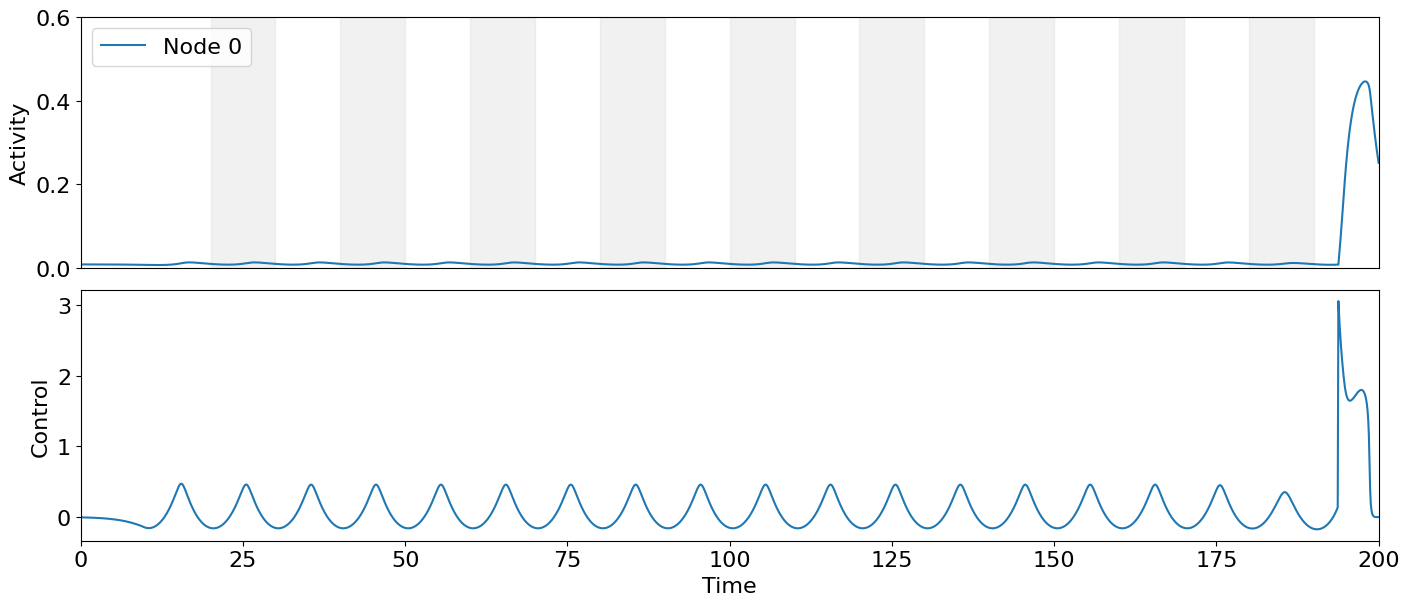

itar =  1
iw =  0 1e-07
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2616503198292393
Cost in iteration 50: -0.26172328626605246
Cost in iteration 100: -0.26173482678760013
Final cost : -0.26173482678760013


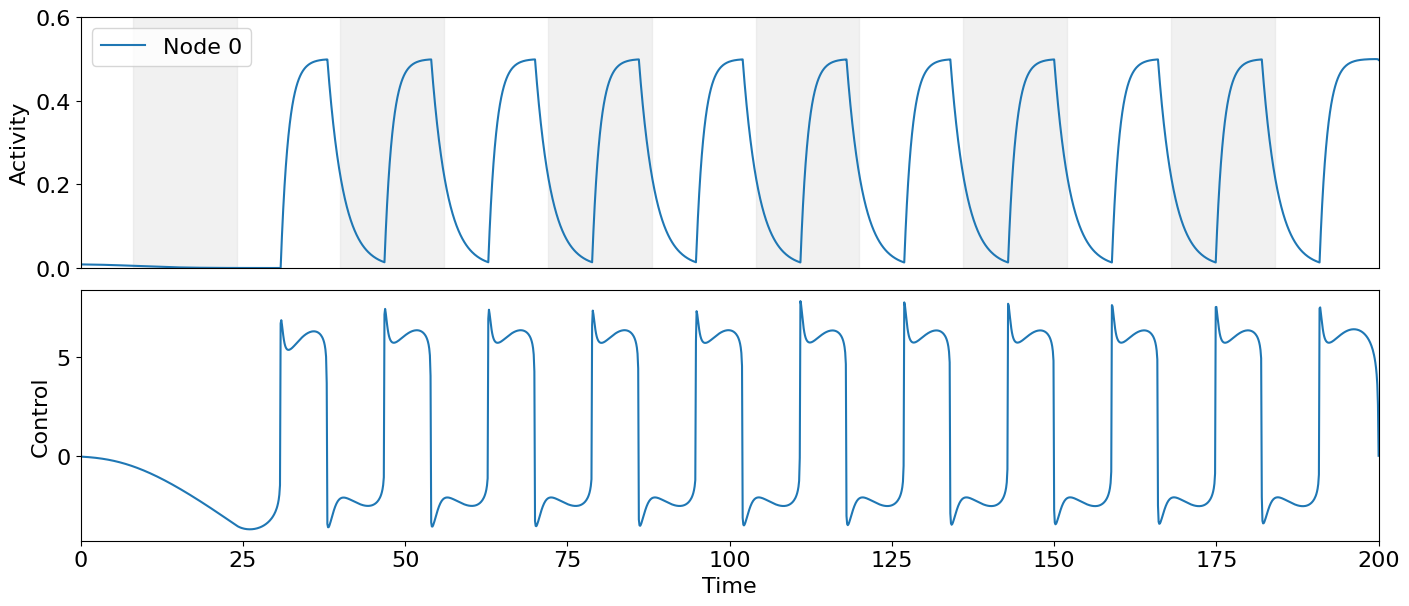

iw =  1 1e-06
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2603782673194322
Cost in iteration 50: -0.2605704493423504
Cost in iteration 100: -0.2605998143004016
Final cost : -0.2605998143004016


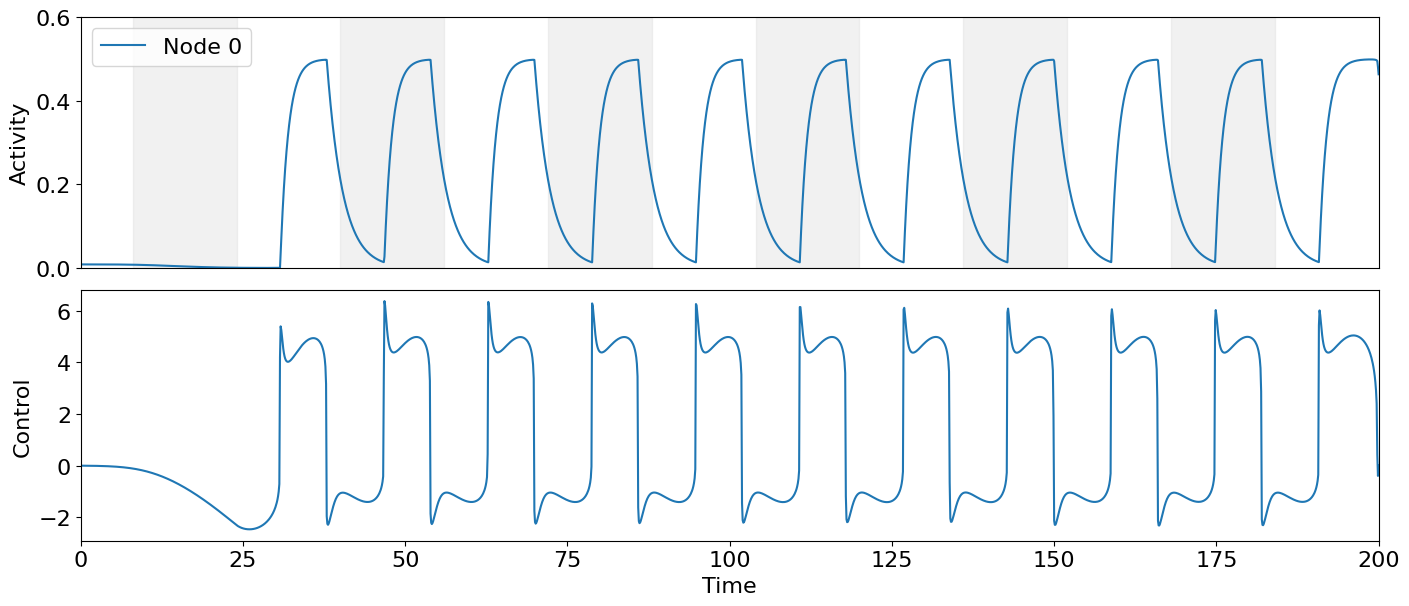

iw =  2 1e-05
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.25186659043893733
Cost in iteration 50: -0.25231608958362406
Cost in iteration 100: -0.2524840317656431
Final cost : -0.2524840317656431


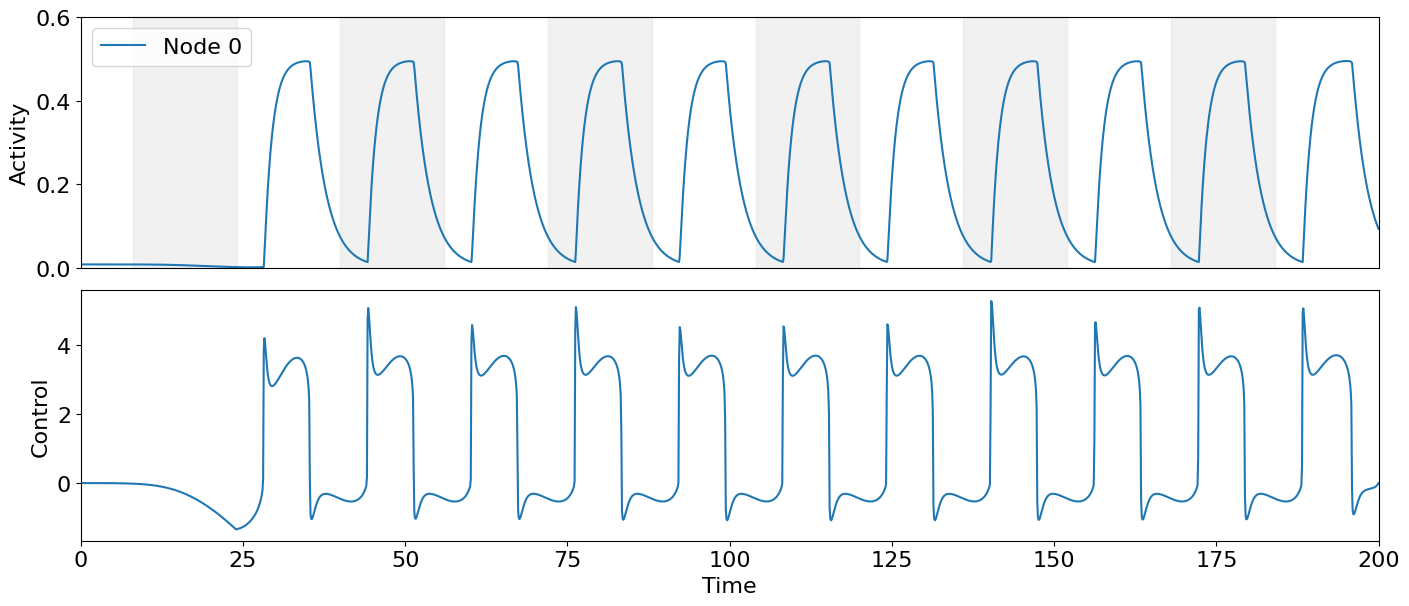

iw =  3 0.0001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2216463065922065
Cost in iteration 50: -0.22396546844824186
Cost in iteration 100: -0.22396546845706516
Final cost : -0.22396546845706516


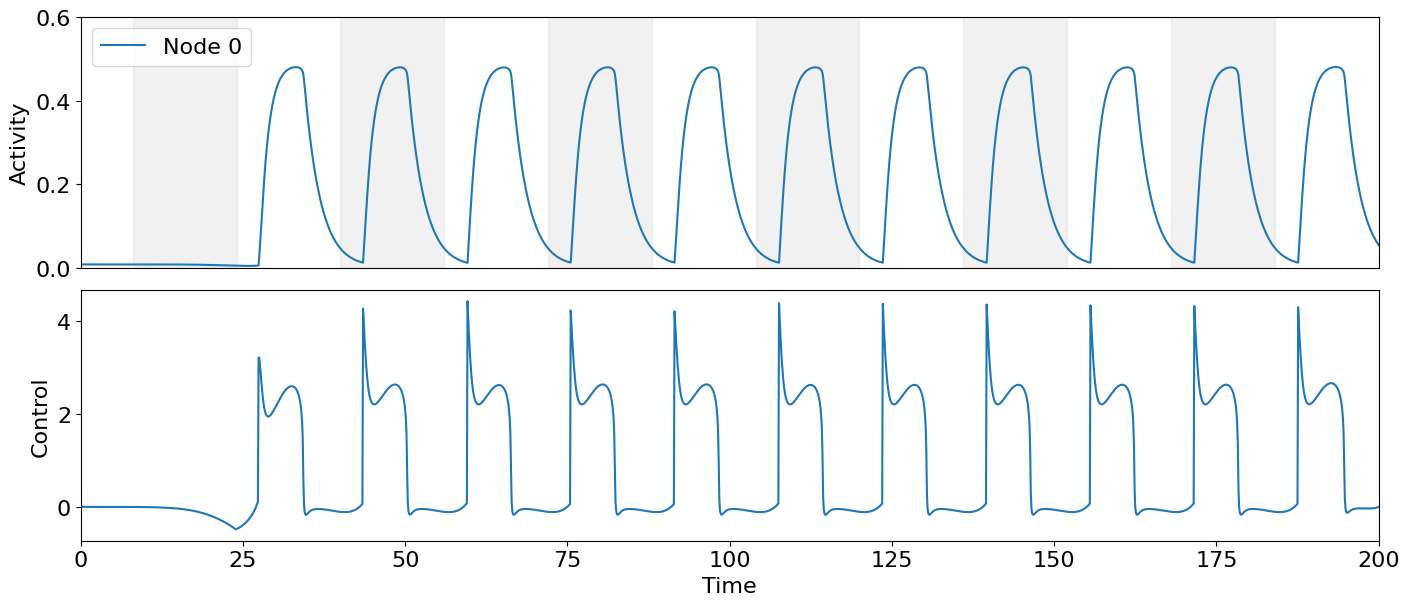

iw =  4 0.0004
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.16389959479030858
Cost in iteration 50: -0.16968707011294934
Cost in iteration 100: -0.16968707112151737
Final cost : -0.16968707112151737


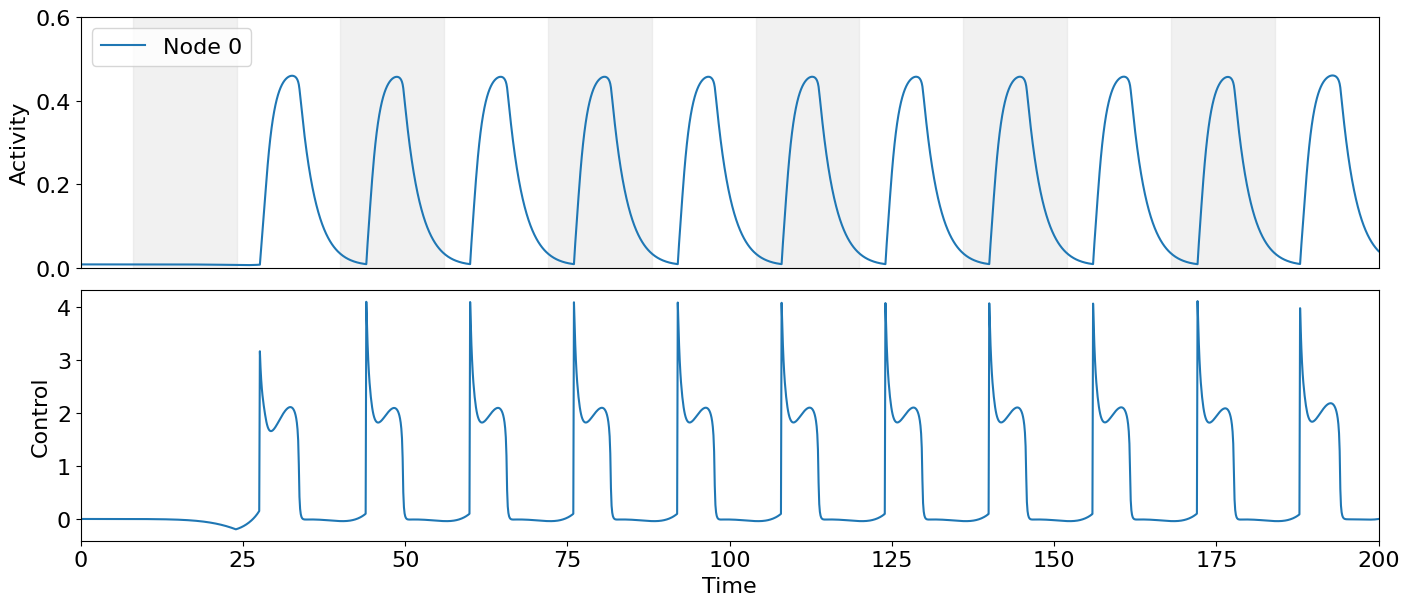

iw =  5 0.0005
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.14993218835651817
Cost in iteration 50: -0.15607565702087595
Cost in iteration 100: -0.15607568984142045
Final cost : -0.15607568984142045


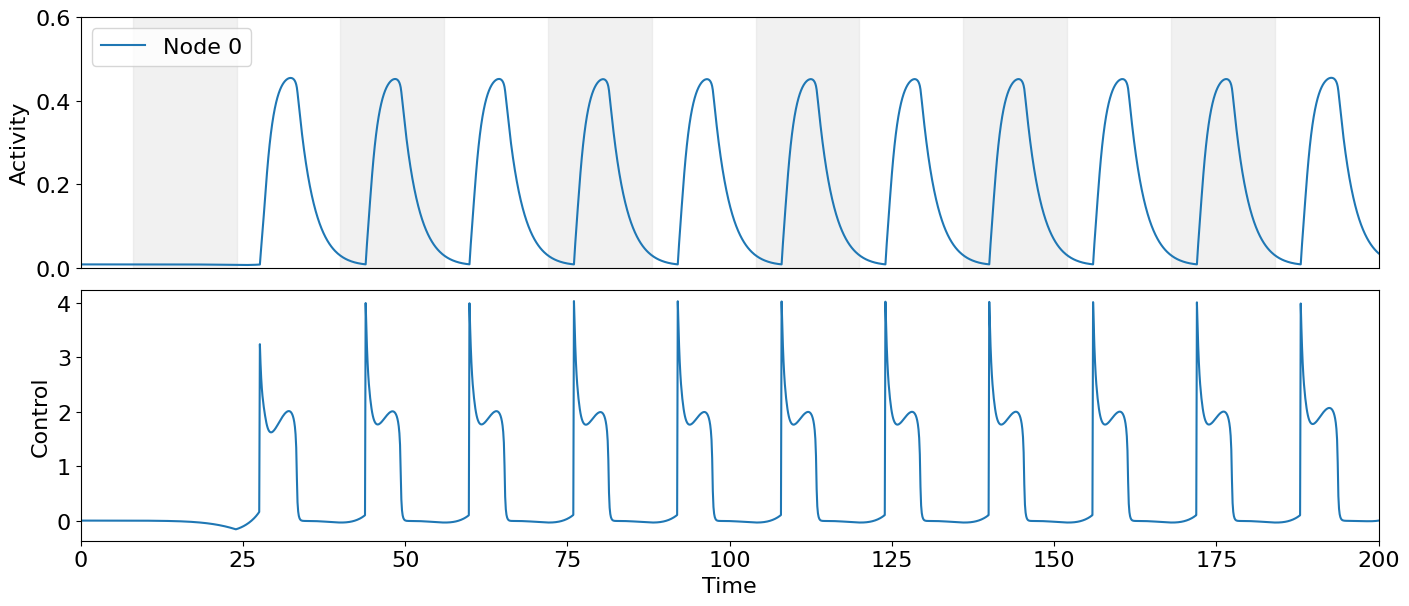

iw =  6 0.0006000000000000001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.1373842527199088
Cost in iteration 50: -0.14379213641990274
Cost in iteration 100: -0.14379216289054678
Final cost : -0.14379216289054678


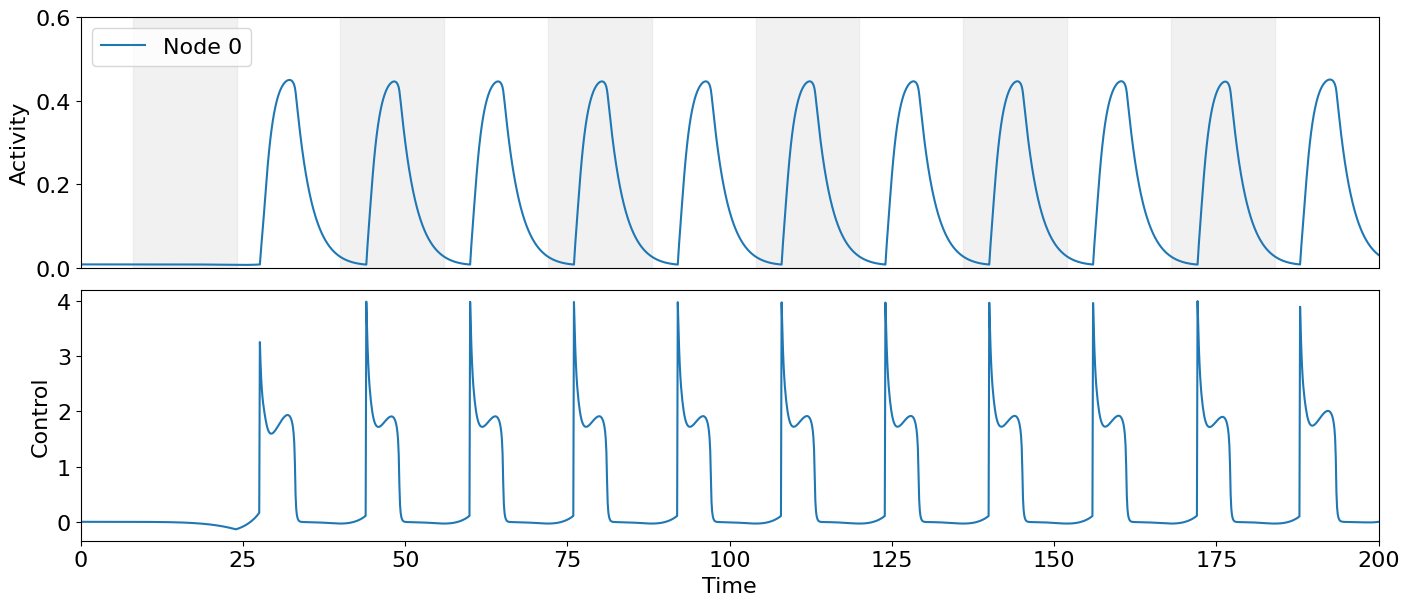

iw =  7 0.0007
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.12606321062298373
Cost in iteration 50: -0.13275024307957853
Cost in iteration 100: -0.1327502705268
Final cost : -0.1327502705268


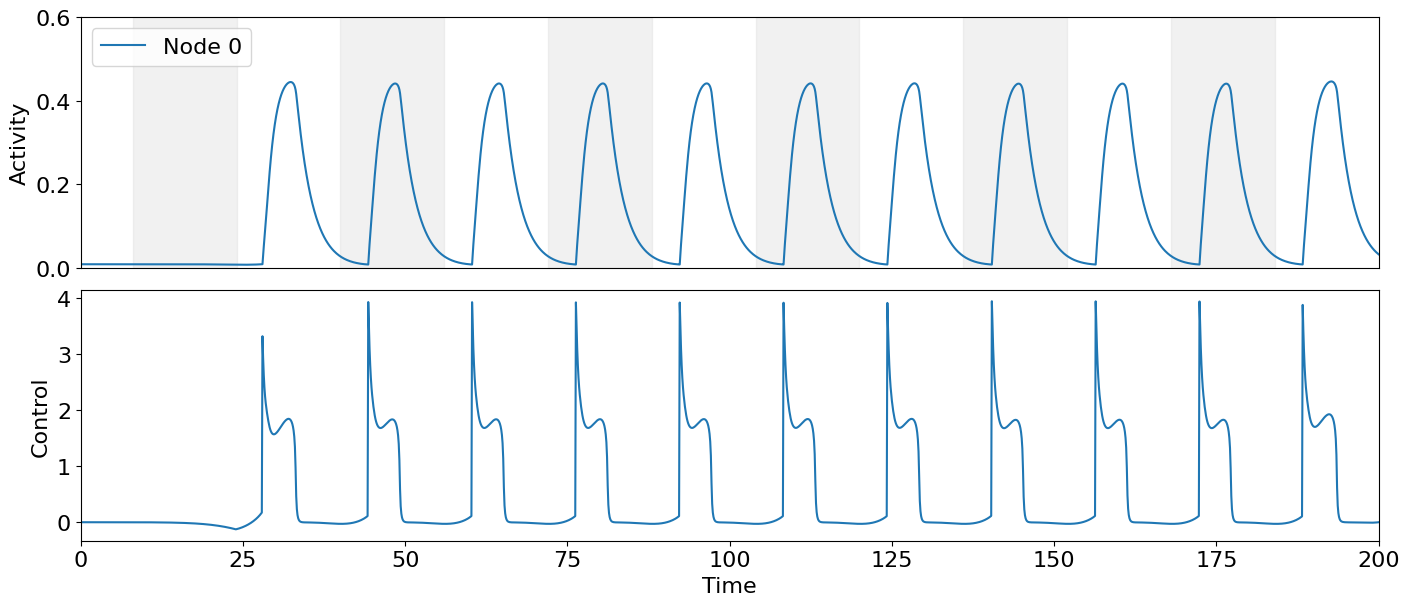

pind =  1
itar =  0
iw =  0 1e-07
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.21035951948485287
Cost in iteration 50: -0.21055600123768362
Cost in iteration 100: -0.21098473281906532
Final cost : -0.21098473281906532


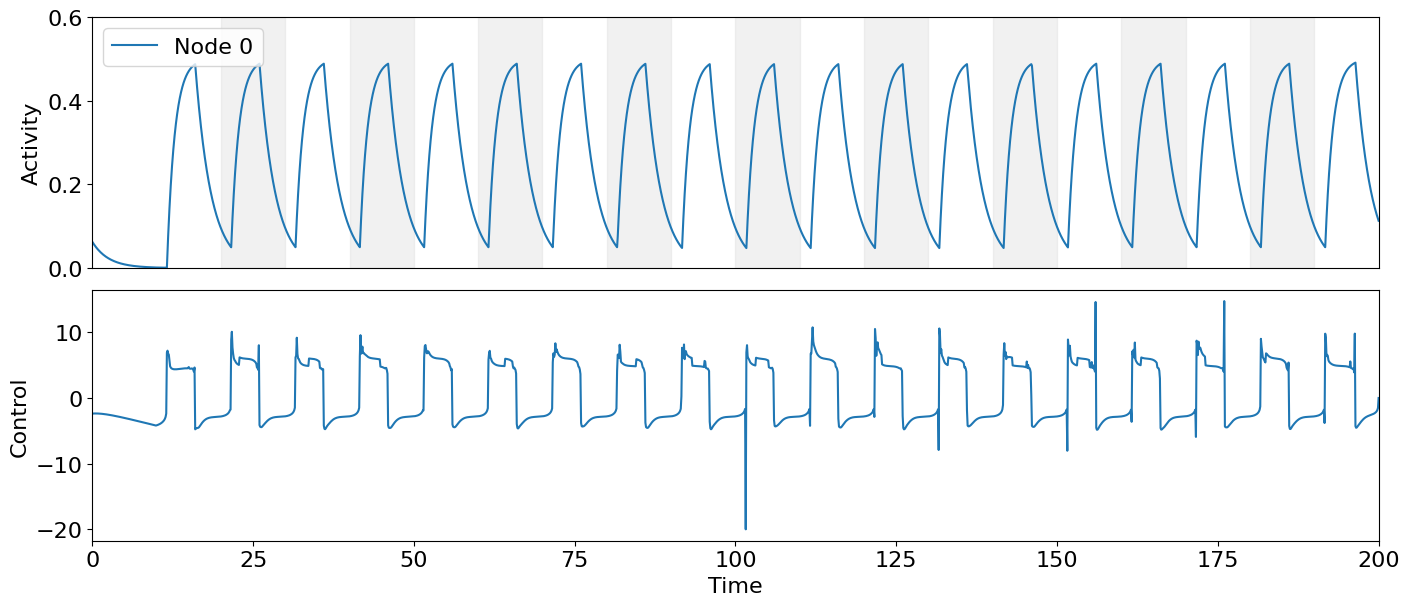

iw =  1 1e-06
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20925022789232717
Cost in iteration 50: -0.20942229292816567
Cost in iteration 100: -0.2097017070267701
Final cost : -0.2097017070267701


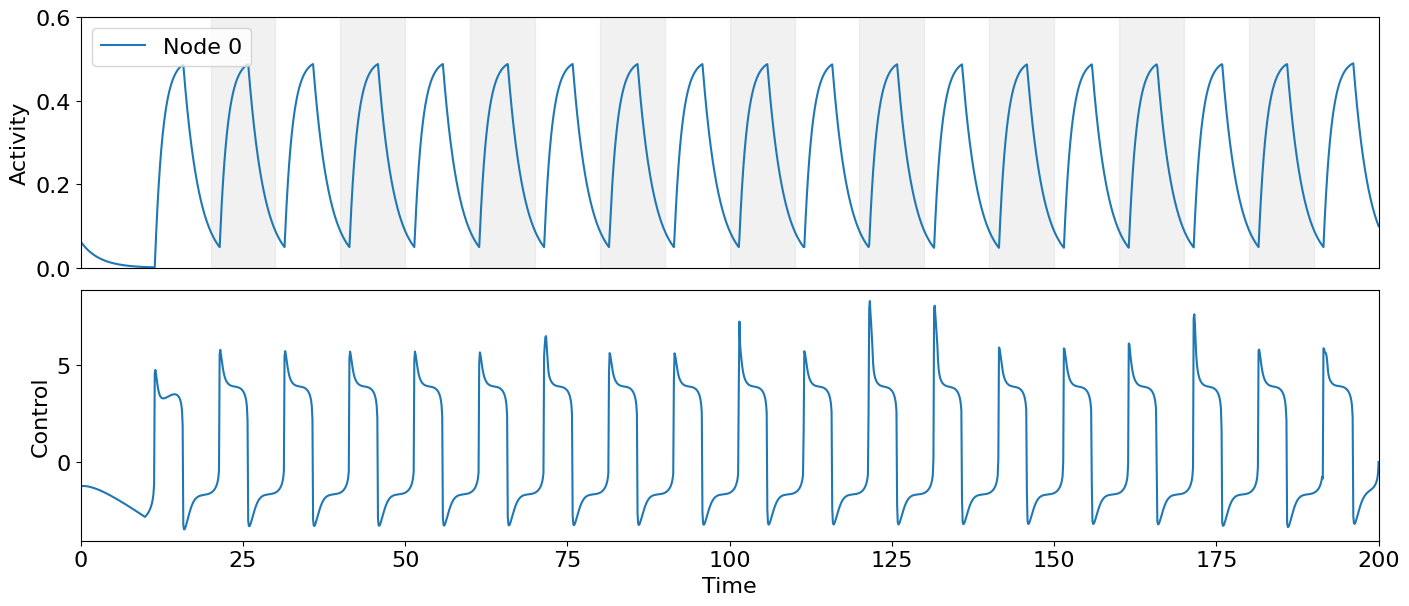

iw =  2 1e-05
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20418521962152372
Cost in iteration 50: -0.20424035255520082
Cost in iteration 100: -0.20427117037318204
Final cost : -0.20427117037318204


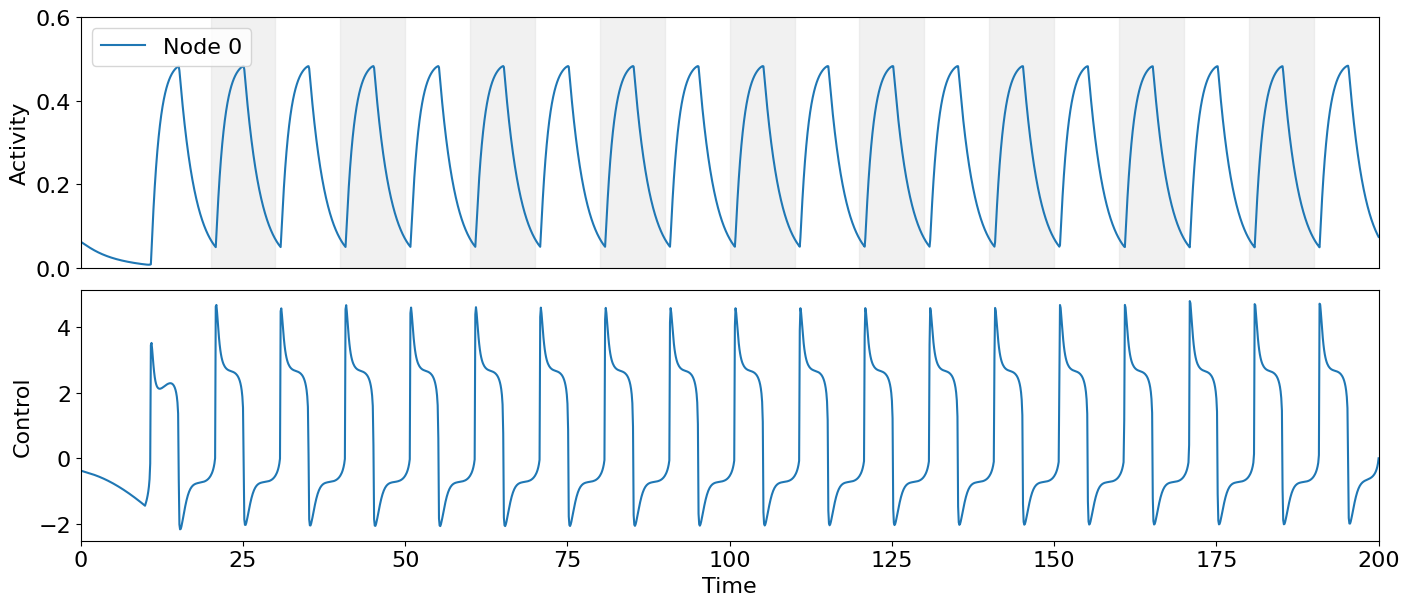

iw =  3 0.0001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.1839575053224985
Cost in iteration 50: -0.1842465220194356
Cost in iteration 100: -0.18426071638234348
Final cost : -0.18426071638234348


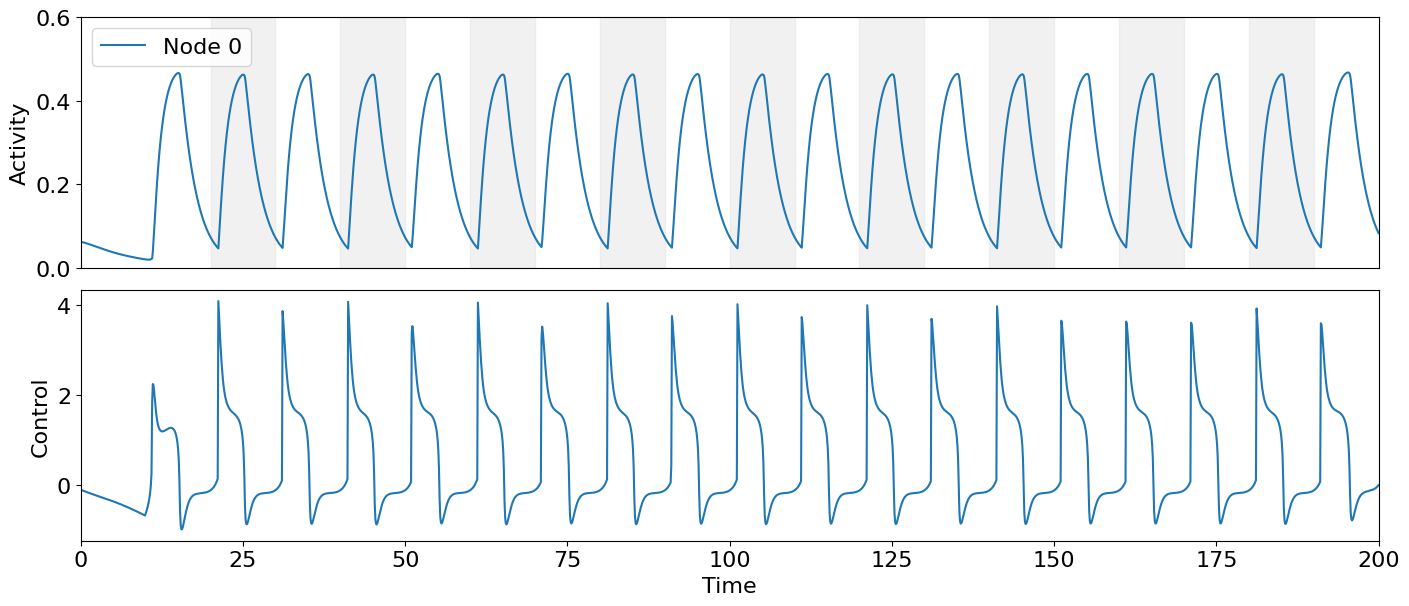

iw =  4 0.0005
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0903526247482542
Cost in iteration 50: -0.0904368172359781
Cost in iteration 100: -0.09057168179011288
Final cost : -0.09057168179011288


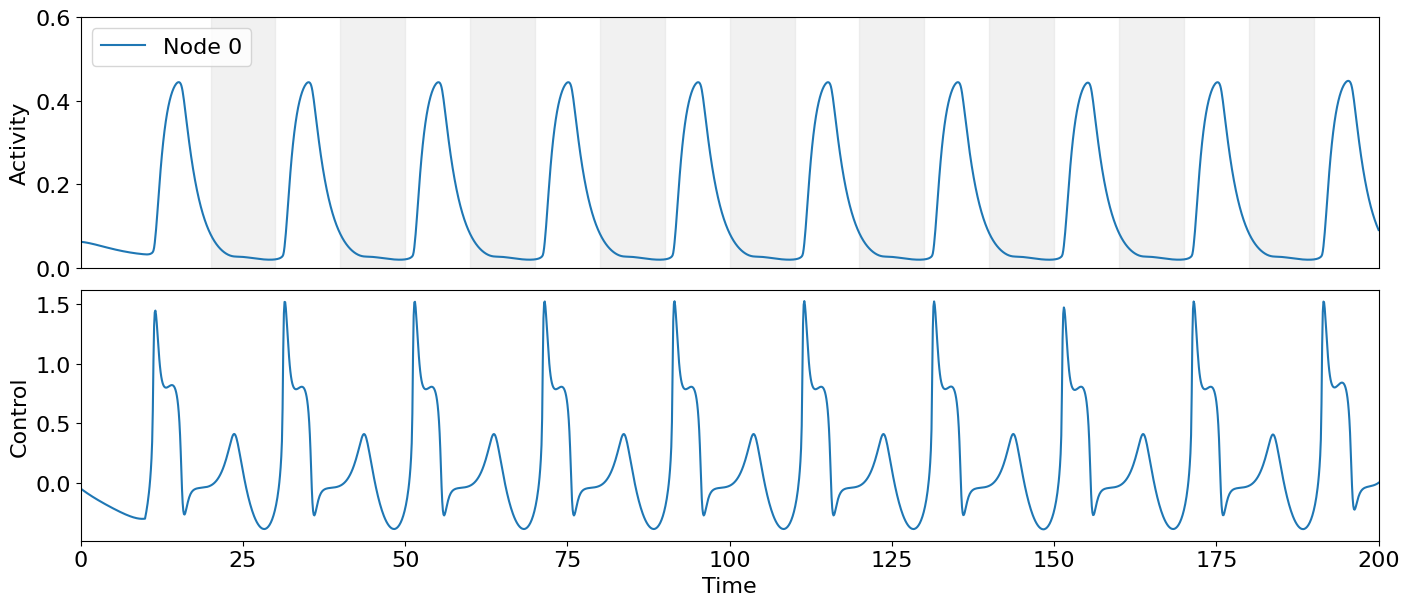

iw =  5 0.001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.08177123193458194
Cost in iteration 50: -0.08202927634791016
Cost in iteration 100: -0.08245783358864713
Final cost : -0.08245783358864713


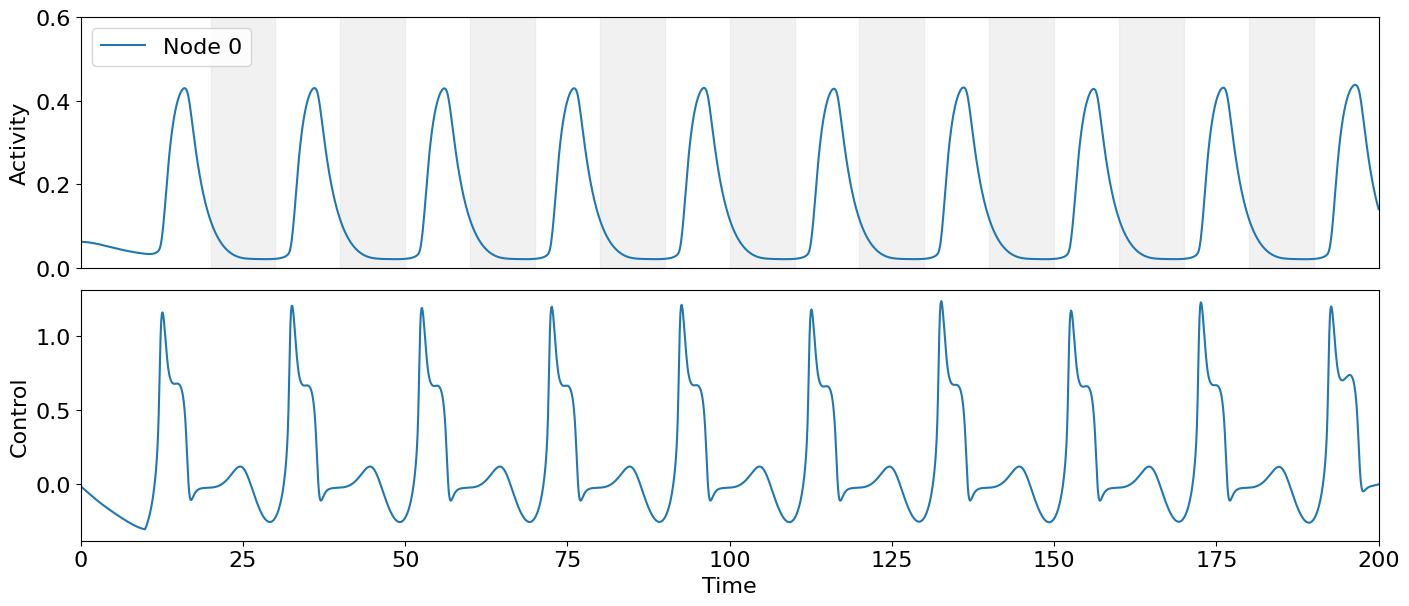

iw =  6 0.002
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.07000754733841053
Cost in iteration 50: -0.0702369910923592
Cost in iteration 100: -0.07064609369060221
Final cost : -0.07064609369060221


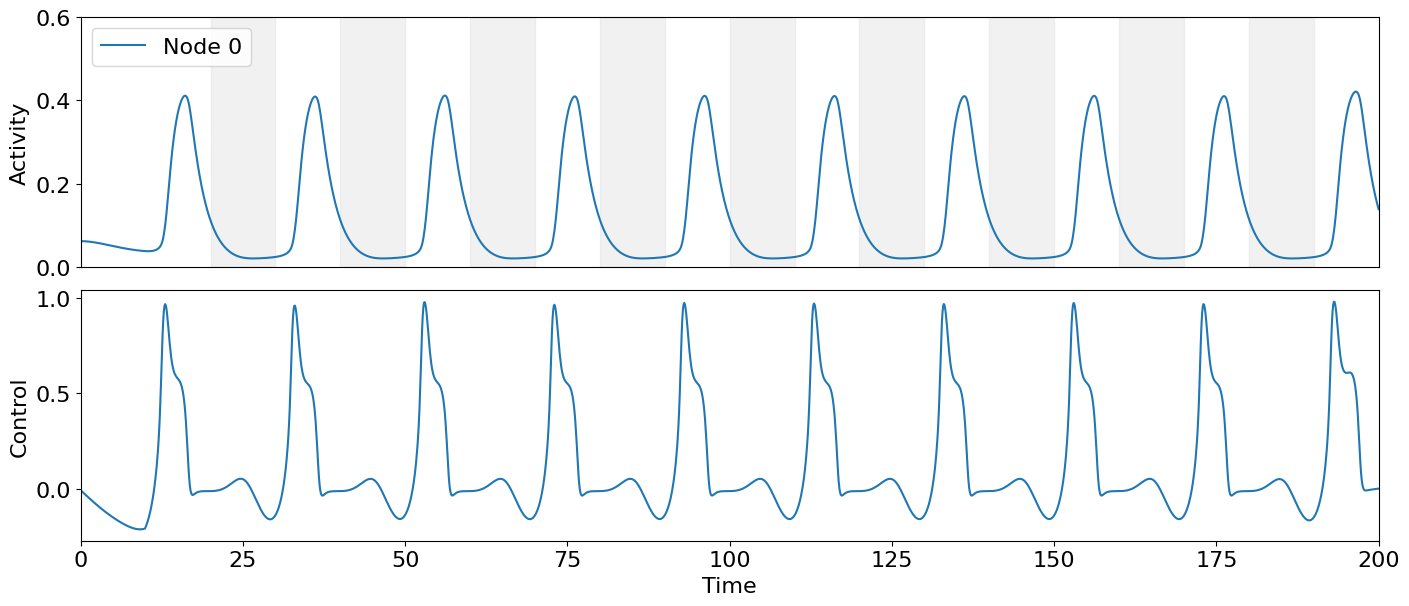

iw =  7 0.01
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.02420330599010187
Cost in iteration 50: -0.024247831520302715
Cost in iteration 100: -0.02431997054799208
Final cost : -0.02431997054799208


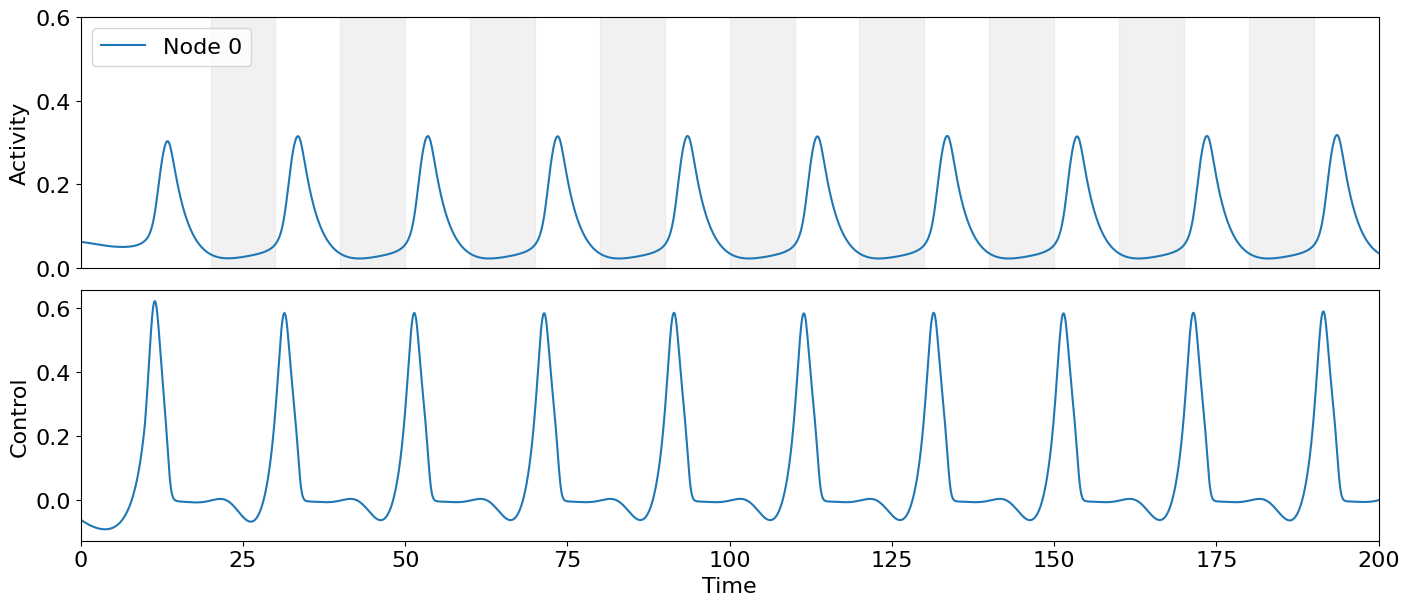

iw =  8 0.02
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0017993713528348244
Converged in iteration 37 with cost -0.0017993713619830051
Final cost : -0.0017993713619830051


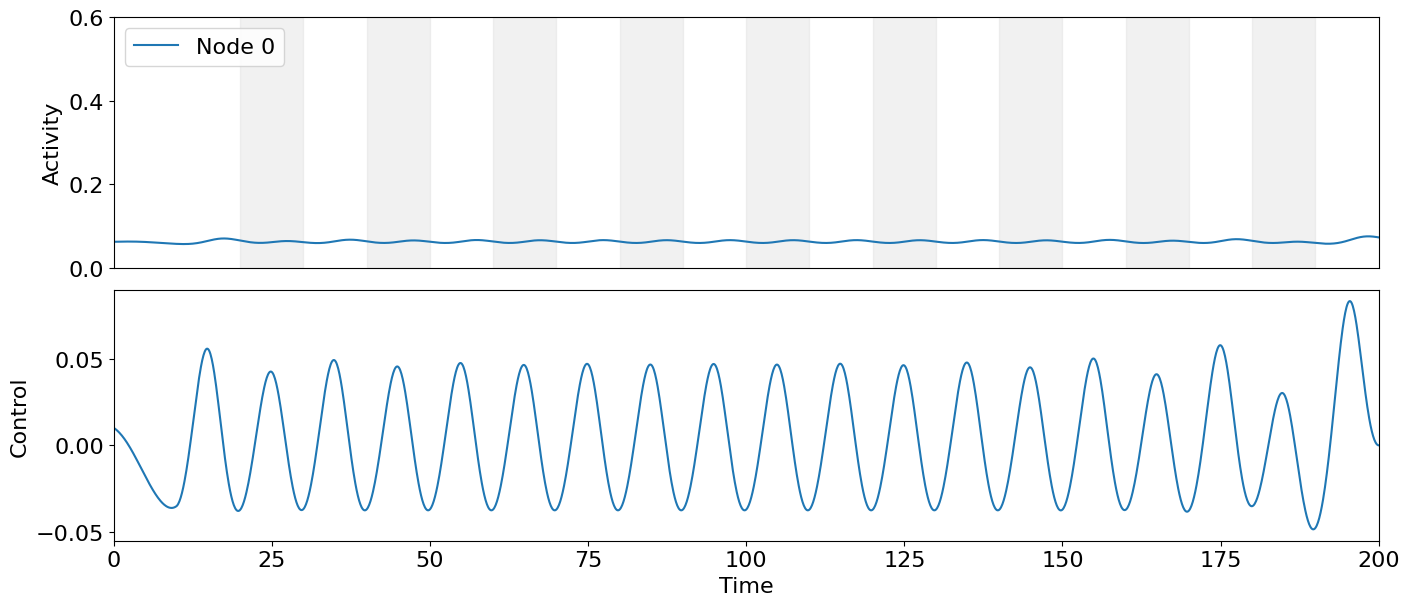

iw =  9 0.03
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0011809049638068568
Converged in iteration 46 with cost -0.00118090497567434
Final cost : -0.00118090497567434


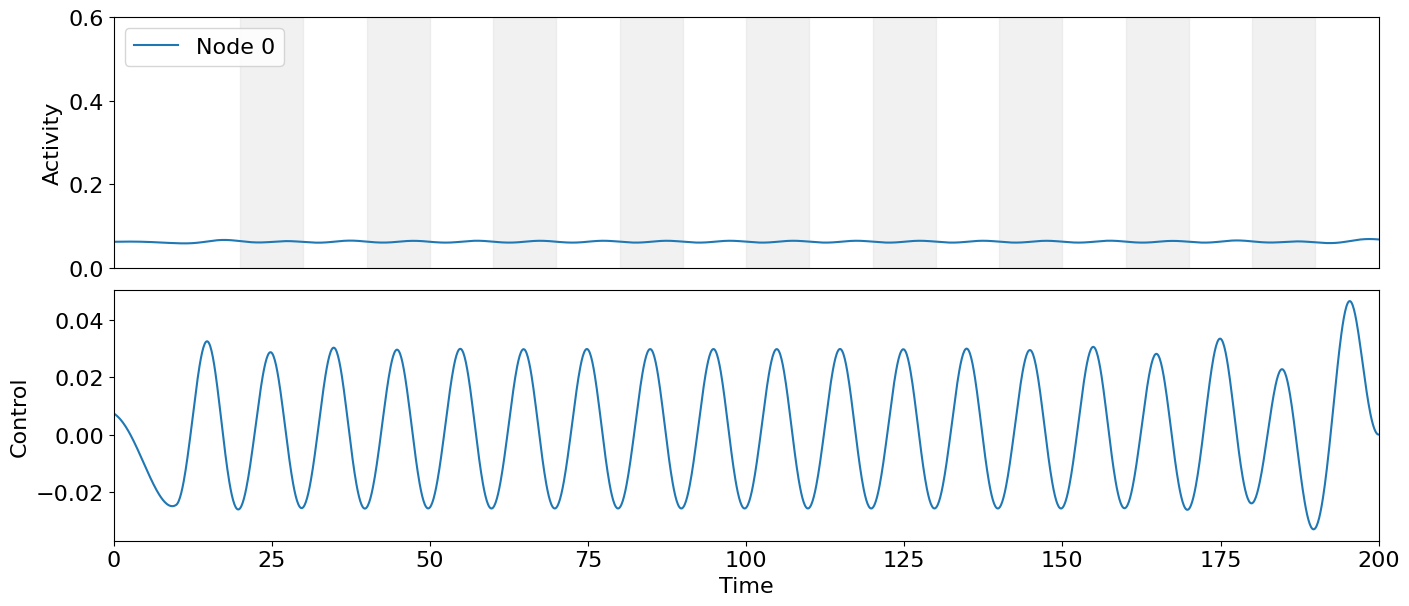

itar =  1
iw =  0 1e-07
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2579177185822277
Cost in iteration 50: -0.25798317029300866
Cost in iteration 100: -0.25807682638861934
Final cost : -0.25807682638861934


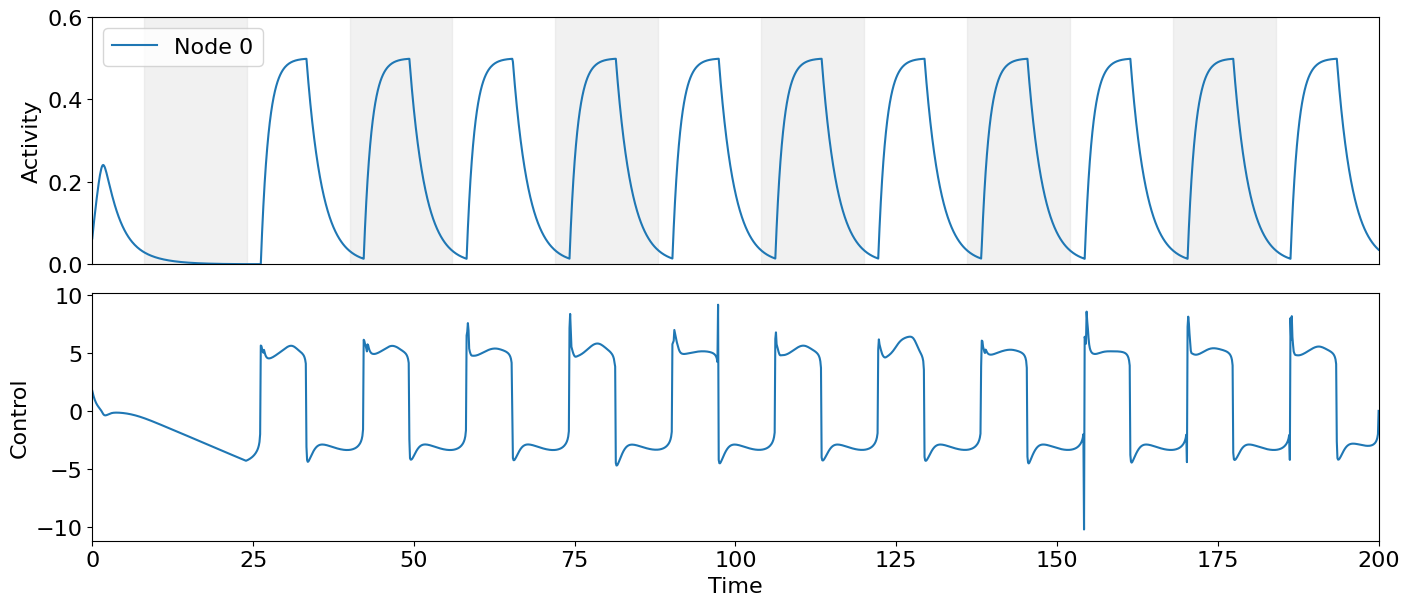

iw =  1 1e-06
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.25695668821141054
Cost in iteration 50: -0.2570187742773487
Cost in iteration 100: -0.25709183922986667
Final cost : -0.25709183922986667


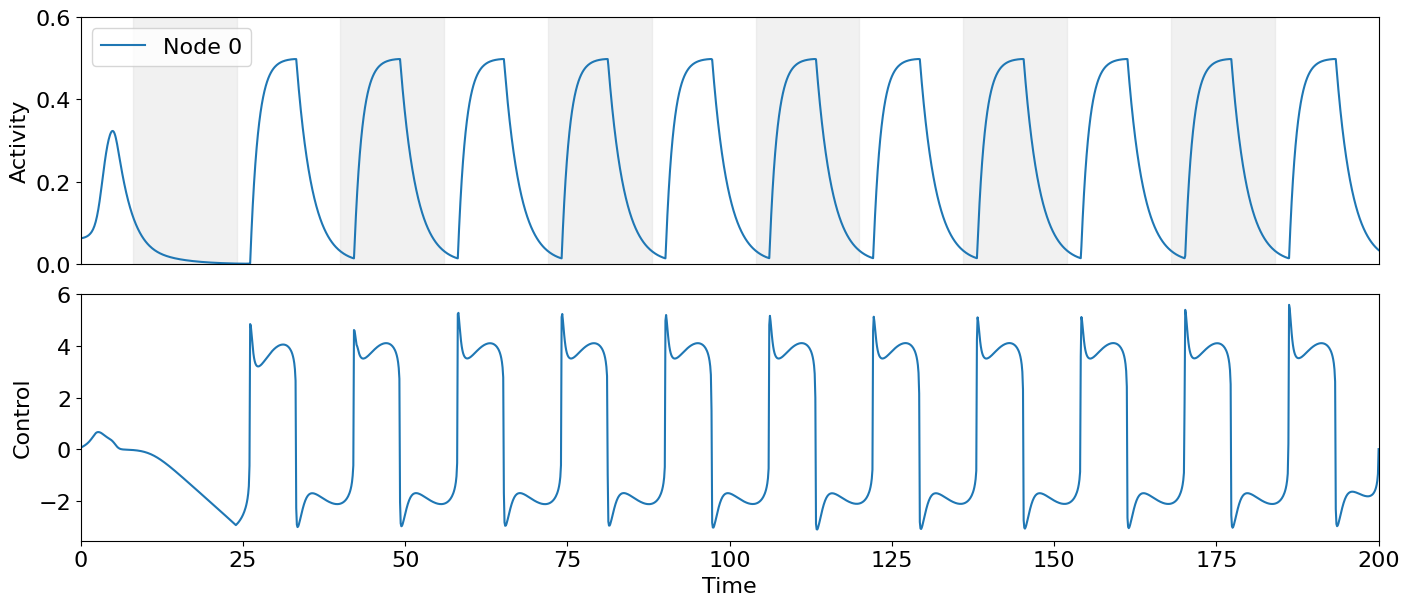

iw =  2 1e-05
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.252686423102725
Cost in iteration 50: -0.25276759551678446
Cost in iteration 100: -0.25277960923473236
Final cost : -0.25277960923473236


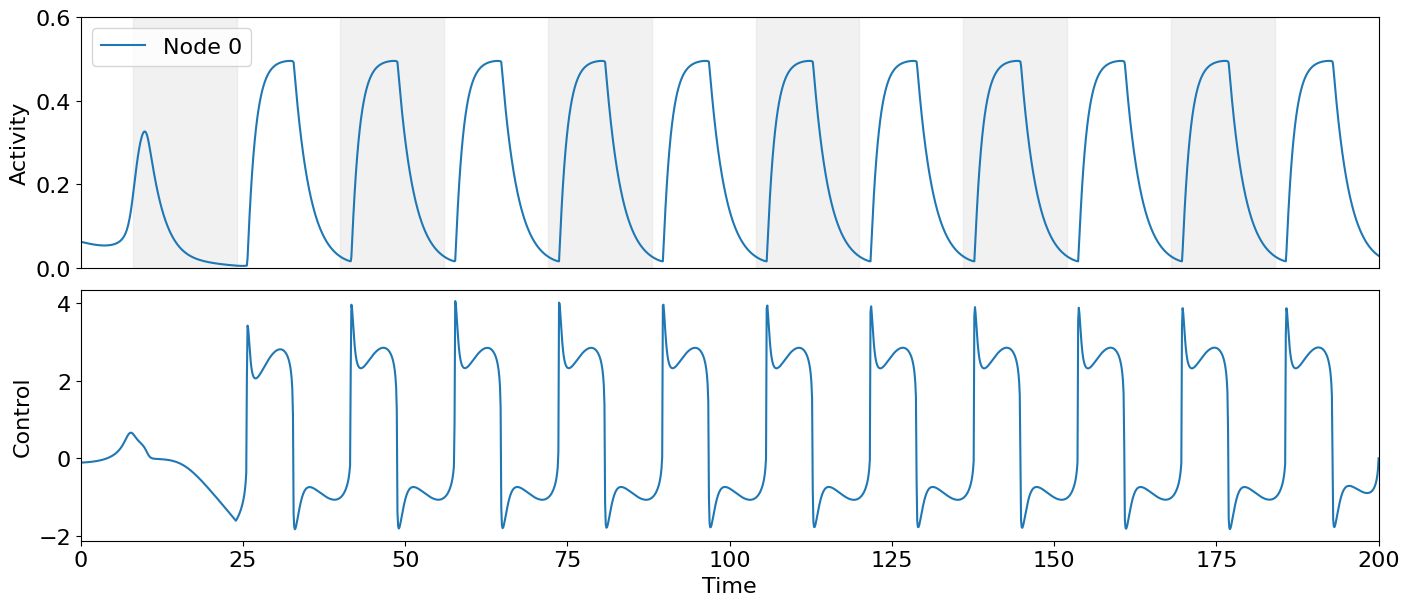

iw =  3 0.0001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.23709210972178363
Cost in iteration 50: -0.23738903525816027
Converged in iteration 72 with cost -0.23738903525843838
Final cost : -0.23738903525843838


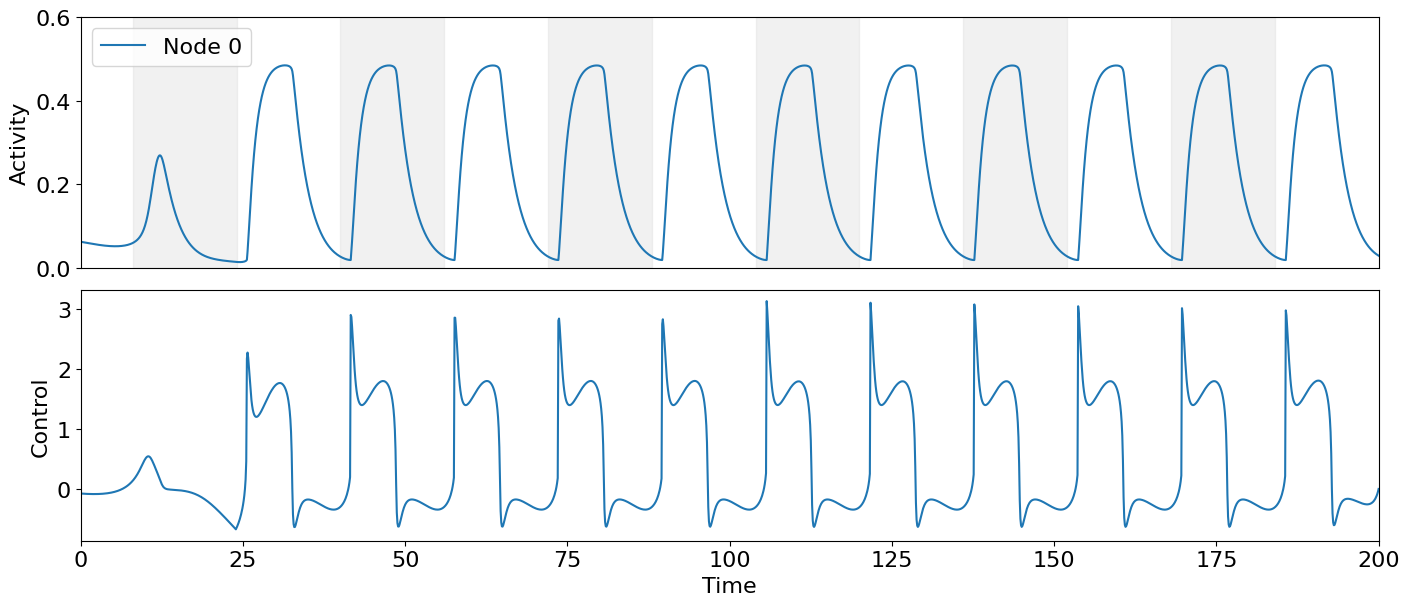

iw =  4 0.001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.18307500084920705
Cost in iteration 50: -0.18415902660674358
Cost in iteration 100: -0.18415902707754542
Final cost : -0.18415902707754542


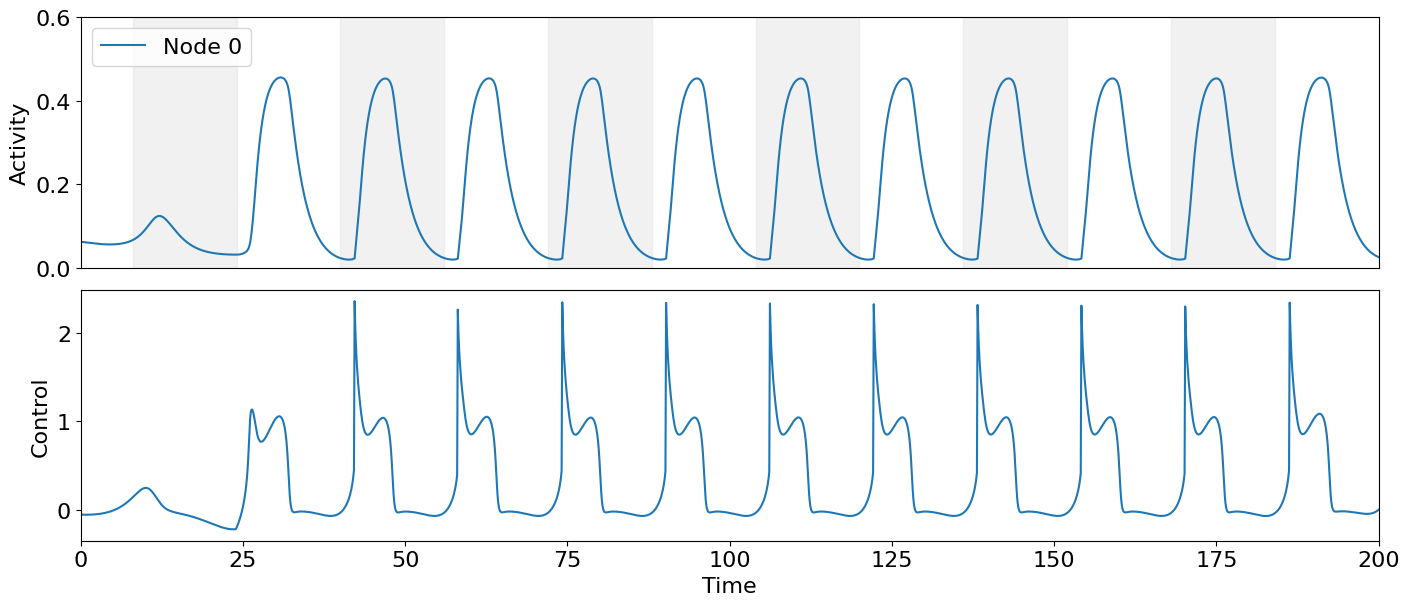

iw =  5 0.005
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.10227905371068423
Cost in iteration 50: -0.10346299972257256
Cost in iteration 100: -0.10347708547179782
Final cost : -0.10347708547179782


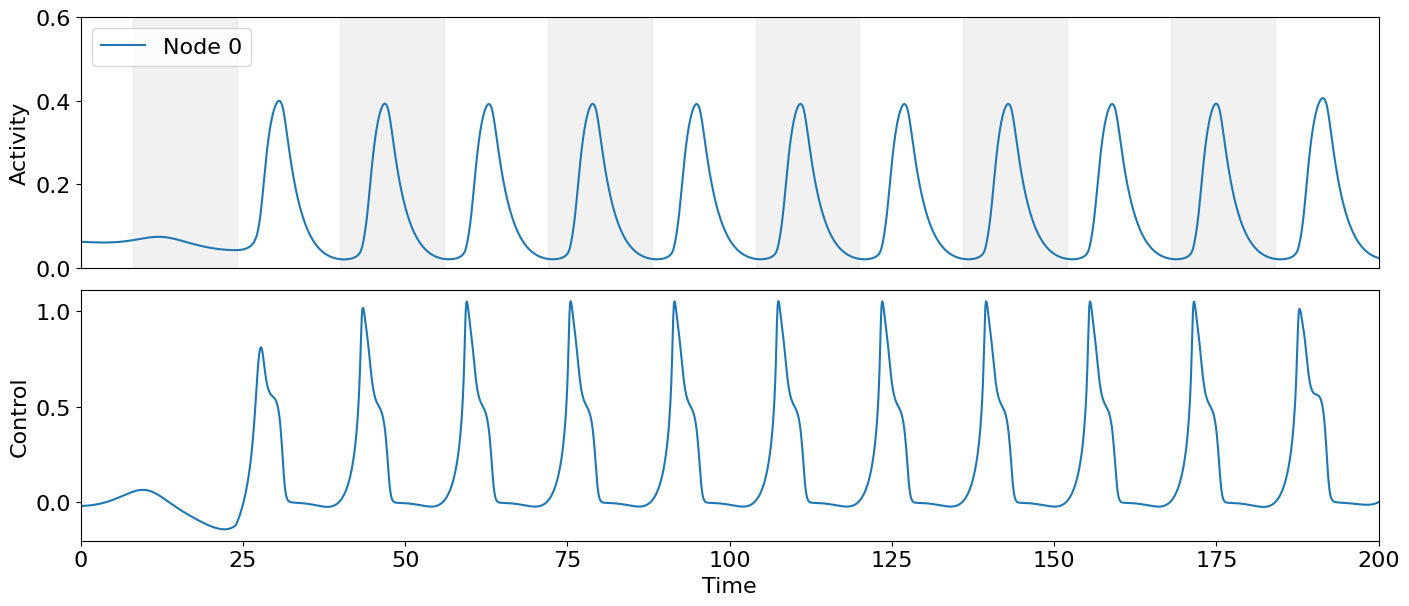

iw =  6 0.006
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.09120276904493901
Cost in iteration 50: -0.09225584889077598
Cost in iteration 100: -0.09227277336400039
Final cost : -0.09227277336400039


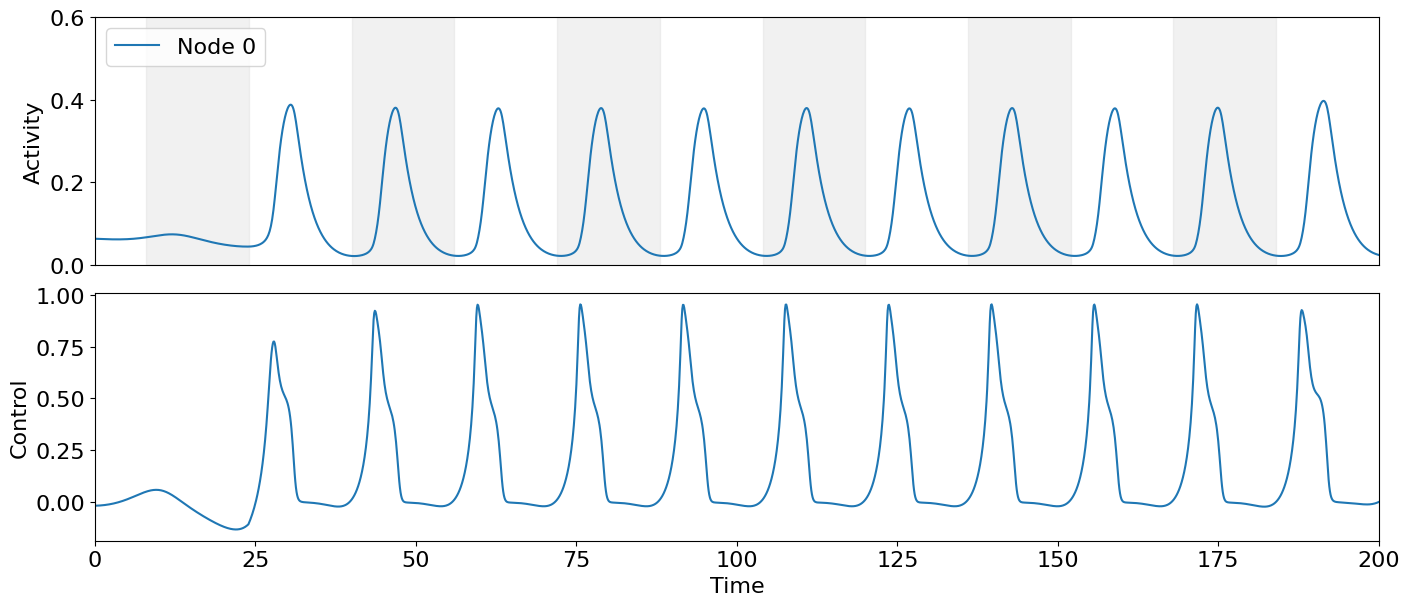

iw =  7 0.007
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.08154862355753235
Cost in iteration 50: -0.0825182780992262
Cost in iteration 100: -0.08253764204173383
Final cost : -0.08253764204173383


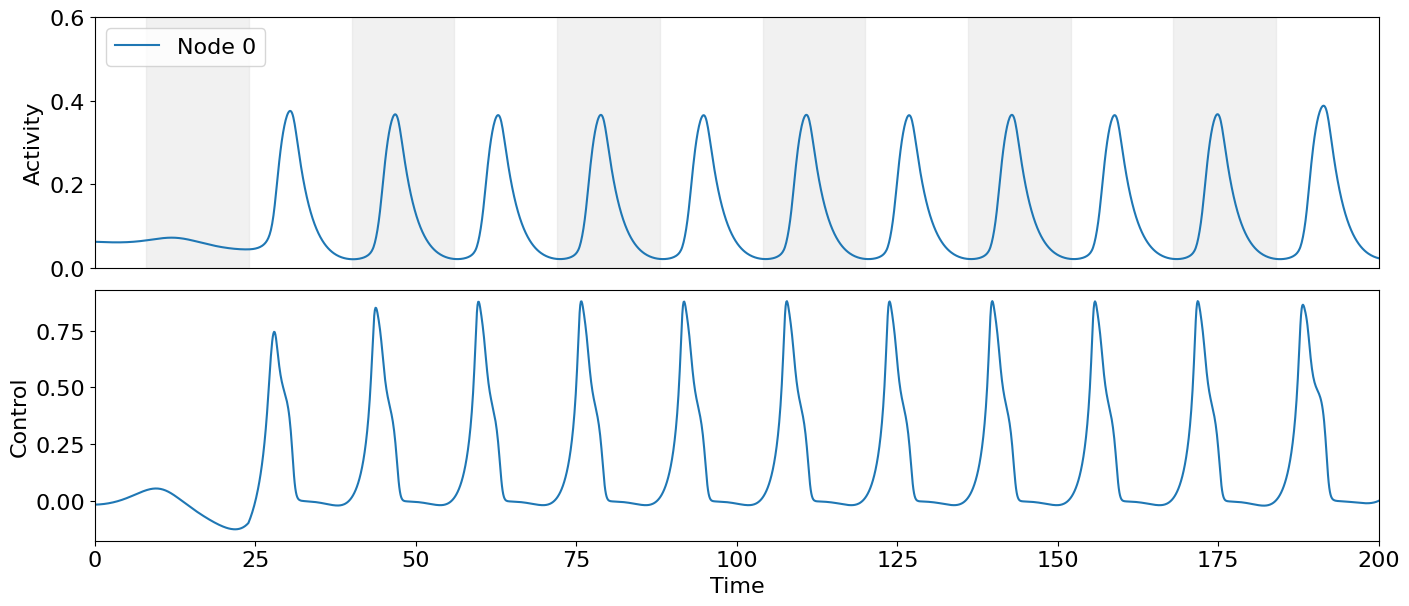

iw =  8 0.008
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.07316149996113289
Cost in iteration 50: -0.07396027430143892
Cost in iteration 100: -0.07398726215745255
Final cost : -0.07398726215745255


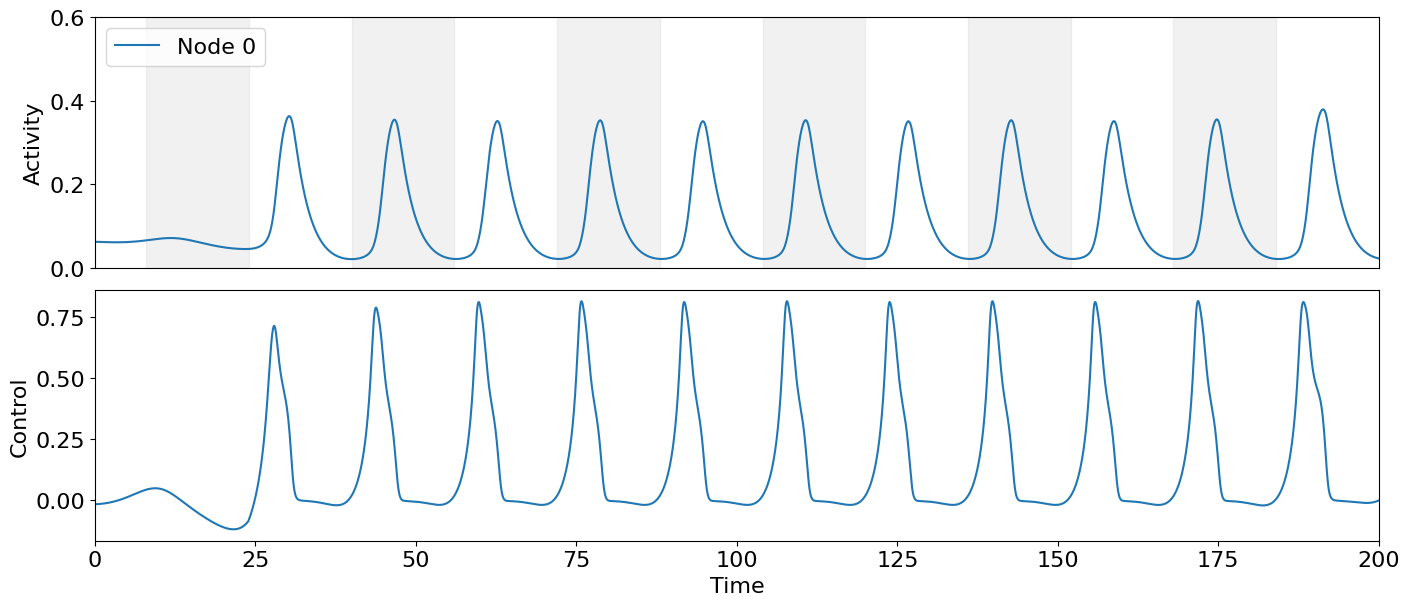

iw =  9 0.009000000000000001
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0656669862030963
Cost in iteration 50: -0.06634224568209611
Cost in iteration 100: -0.06637354869782712
Final cost : -0.06637354869782712


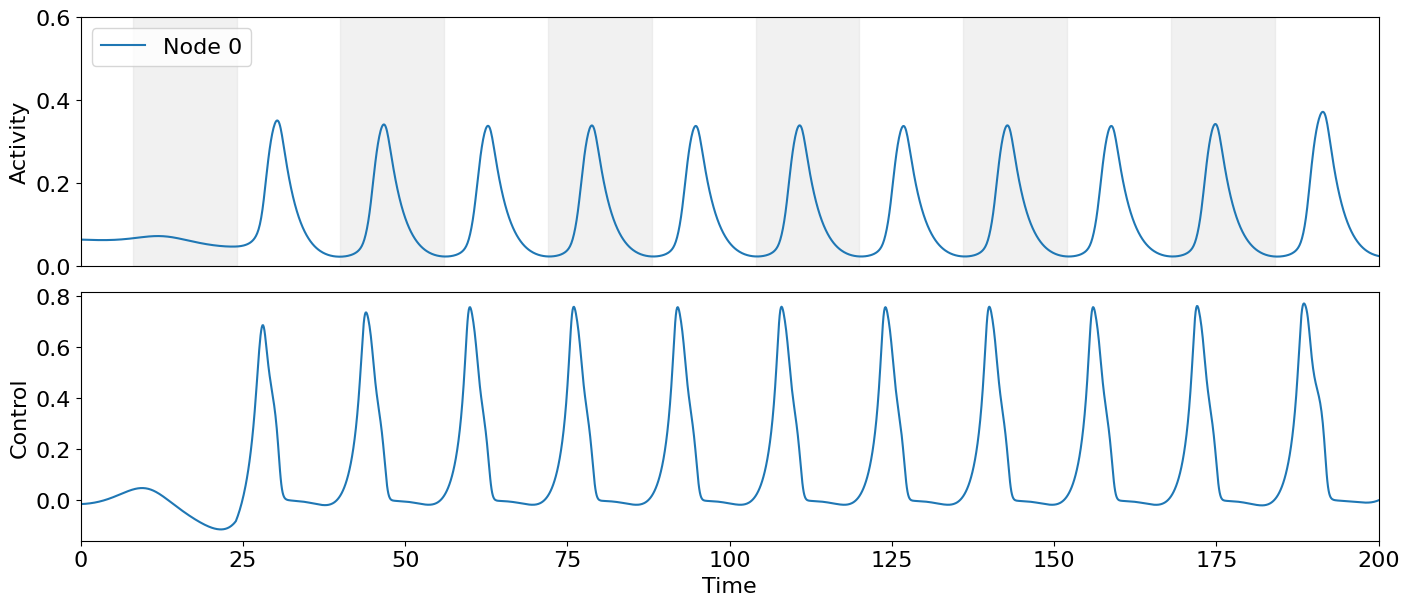

iw =  10 0.01
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.05903920368237952
Cost in iteration 50: -0.05961992172757648
Cost in iteration 100: -0.05966719129253109
Final cost : -0.05966719129253109


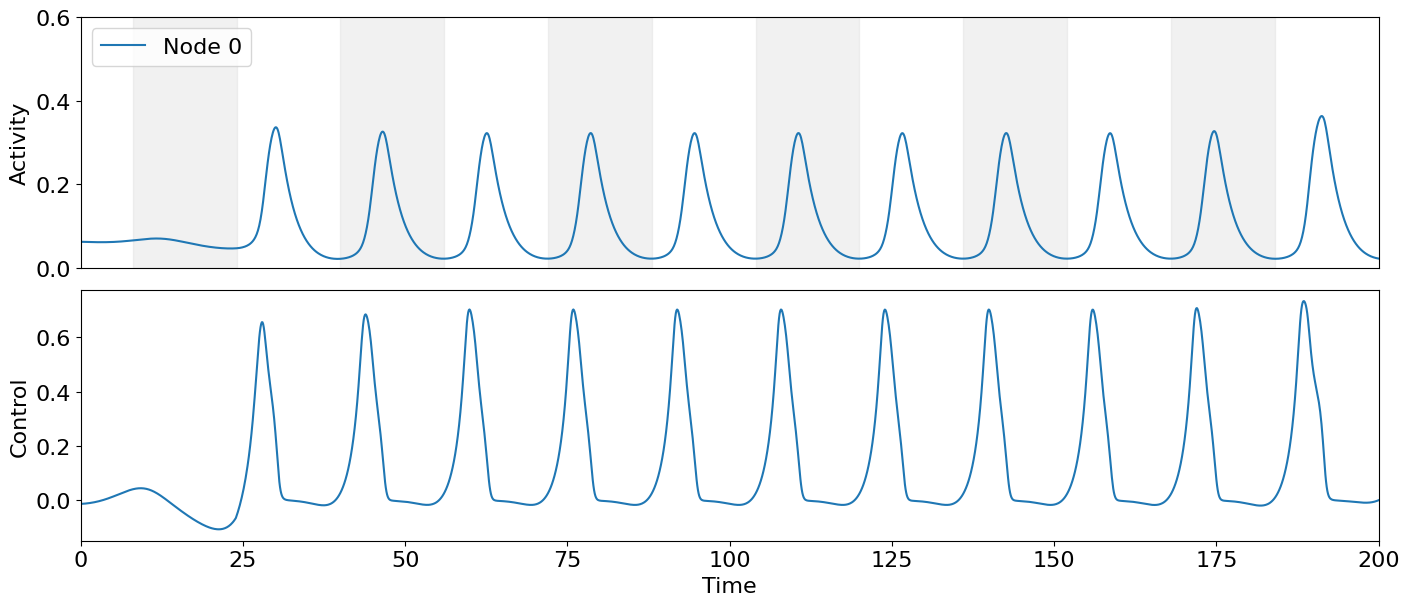

iw =  11 0.02
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.02238794011188909
Cost in iteration 50: -0.022800028185403456
Cost in iteration 100: -0.022919630164071683
Final cost : -0.022919630164071683


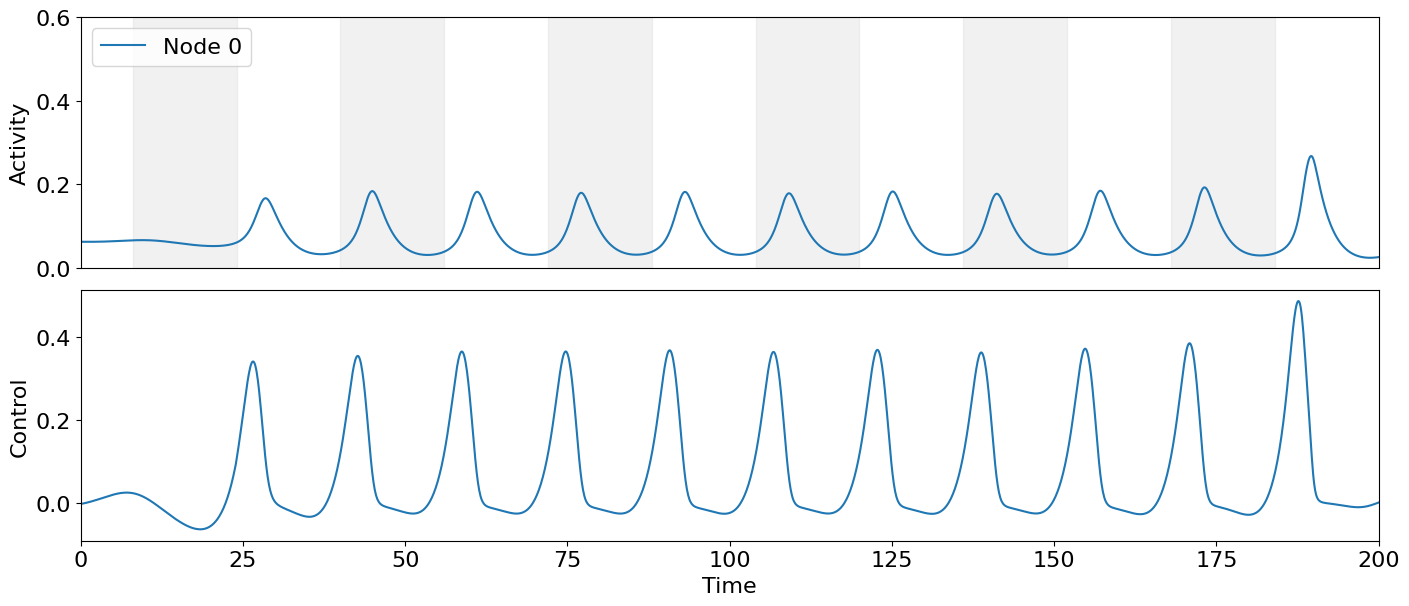

iw =  12 0.03
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.008930635522061033
Cost in iteration 50: -0.009029742557053584
Cost in iteration 100: -0.009038887537036761
Final cost : -0.009038887537036761


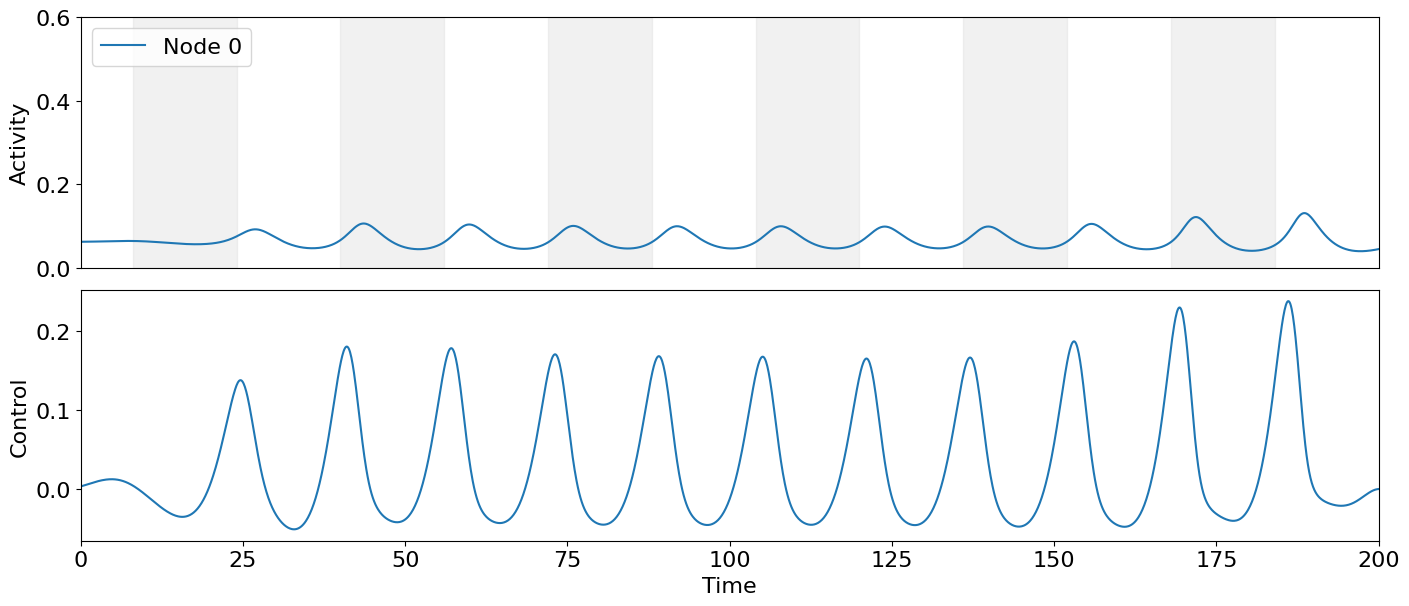

iw =  13 0.04
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.005752395761457688
Cost in iteration 50: -0.005779791066746248
Cost in iteration 100: -0.005780097963121792
Final cost : -0.005780097963121792


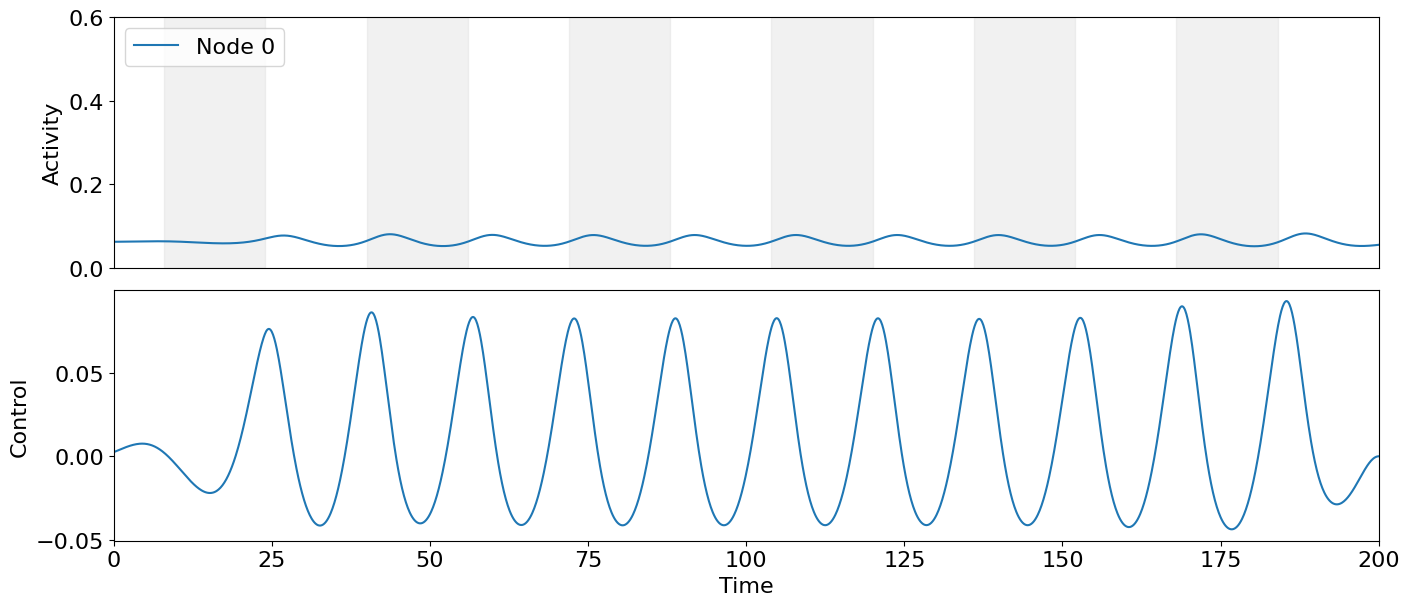

pind =  2


In [19]:
for pind in range(len(comp_points)):

    print("pind = ", pind)

    if pind not in [0,1]:
        continue

    p = comp_points[pind]
    
    testd = 1000.
    model.params.duration = testd
    test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    model.params["exc_ext"] = test_input + p[0]
    model.params["inh_ext"] = test_input + p[1]
    model.run()

    einit = np.zeros((N, 1))
    iinit = np.zeros((N, 1))


    for n in range(N):
        einit[n,:] = model.exc[n,-1]
        iinit[n,:] = model.inh[n,-1]

    model.params.duration = duration

    model.params["exc_ext"] = zero_control[:,0,:] + p[0]
    model.params["inh_ext"] = zero_control[:,0,:] + p[1]

    model.params["exc_init"] = einit
    model.params["inh_init"] = iinit

    model.run()

    for itar in range(len(target_array)):

        print("itar = ", itar)

        if itar not in [0,1]:
            continue

        target_period = target_array[itar]
        i00 = 0
        int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)     
        while int0 > 1.5*target_array[itar]/dt:
            i00 += 1
            int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)

        for iw in range(len(w2_array[pind][itar])):

            print("iw = ", iw, w2_array[pind][itar][iw])
                
            w2 = w2_array[pind][itar][iw]

            model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
            model_controlled.weights["w_p"] = 0.
            model_controlled.weights["w_2"] = w2
            model_controlled.weights["w_f"] = 1.

            model_controlled.maximum_control_strength = maxstr

            if type(results["control"][pind][itar][iw]) != type(None):
                model_controlled.control = results["control"][pind][itar][iw].copy()
                model_controlled.update_input()

            model_controlled.optimize(it)
            results["control"][pind][itar][iw] = model_controlled.control.copy()
            results["state"][pind][itar][iw] = model_controlled.get_xs()

            fname = str(pind) + "_" + str(itar) + "_" + str(iw) + ".png"
            plot_oc_nw(N, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control, filename= os.path.join(dir, fname))

In [12]:
with open('osc_1n.pickle', 'wb') as f:
    pickle.dump(results, f)

In [7]:
with open('osc_1n.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['control', 'state'])


In [13]:
def getseg(x, u, period):
    peaks = scipy.signal.find_peaks(x, prominence=0.1)[0]
    if len(peaks) < 5:
        return None
        
    per = np.round(period/dt).astype(int)

    meanseg = u[:,:,peaks[1]:peaks[1]+per+1]
    for i in range(2, len(peaks)-2):
        meanseg += u[:,:,peaks[i]:peaks[i]+per+1]
    meanseg /= (len(peaks) - 1)

    return meanseg
    

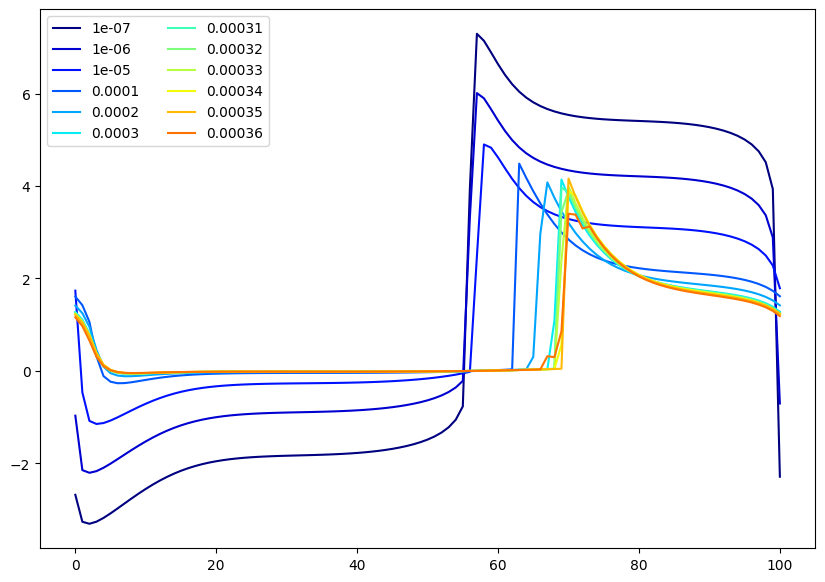

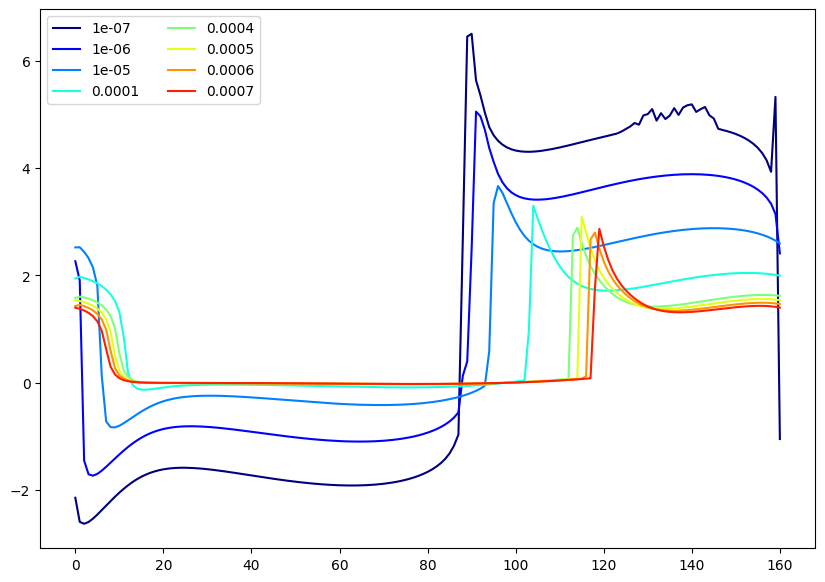

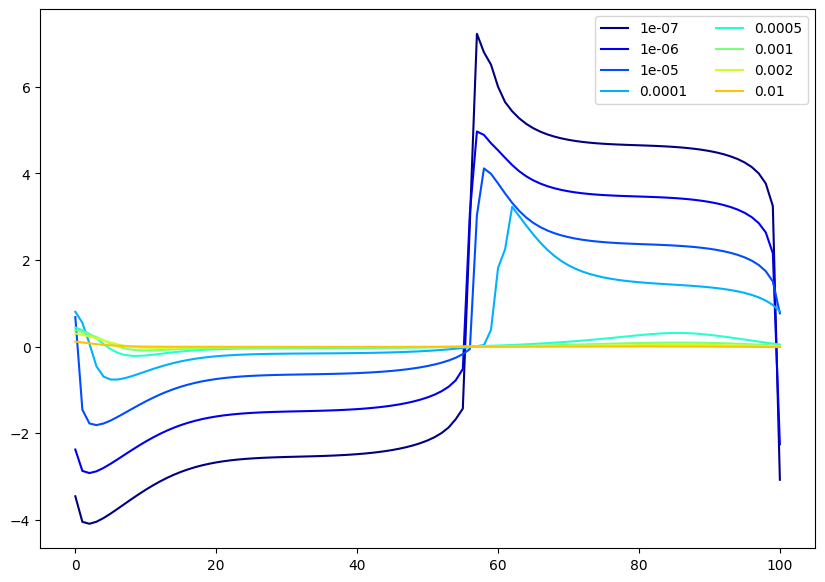

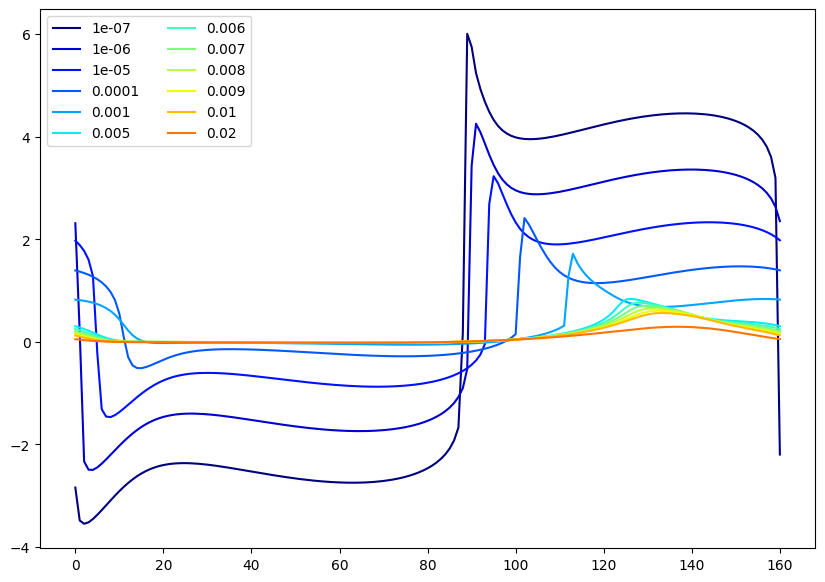

In [15]:
cols = plt.get_cmap('jet')

for pind in [0,1]:
    for itar in [0,1]:

        fig, ax = plt.subplots(figsize=(10,7))

        for iw in range(len(w2_array[pind][itar])):
            seg = getseg(results["state"][pind][itar][iw][0,0,:], results["control"][pind][itar][iw], target_array[itar])

            if seg is None:
                continue

            ax.plot(seg[0,0,:], color=cols(iw/len(w2_array[pind][itar])), label=np.round(w2_array[pind][itar][iw],7))

        ax.legend(ncol=2)
        plt.show()

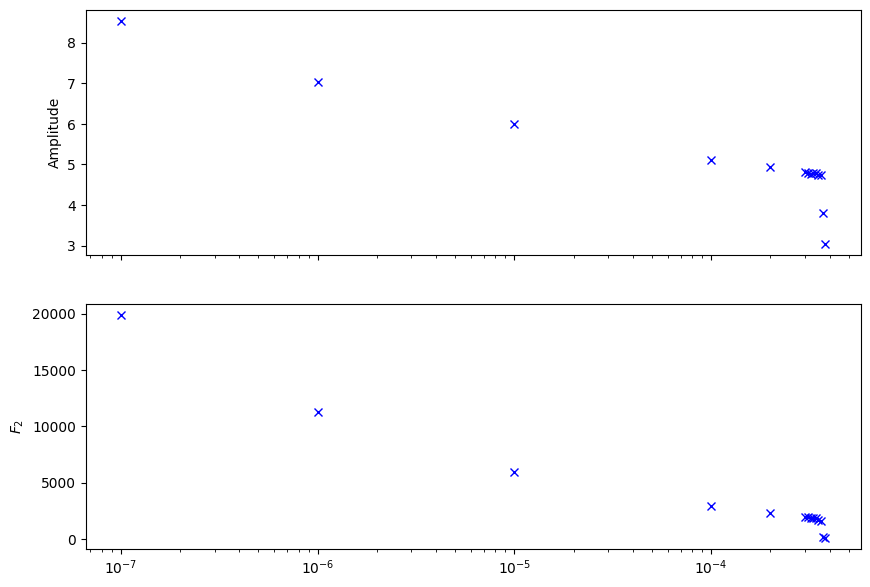

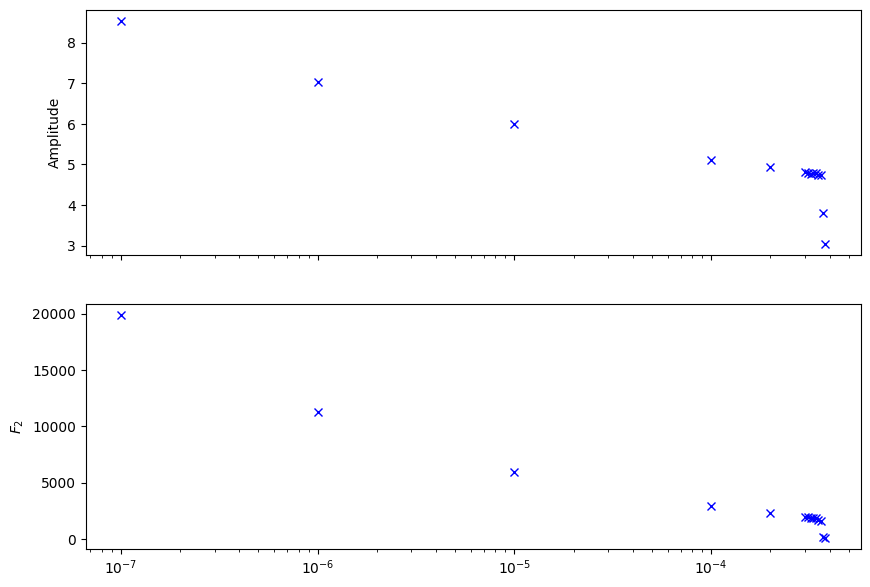

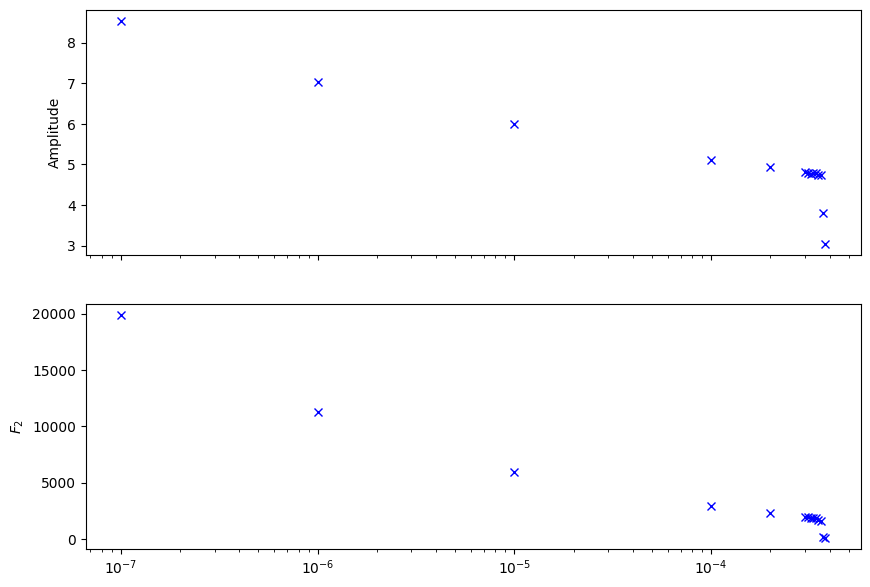

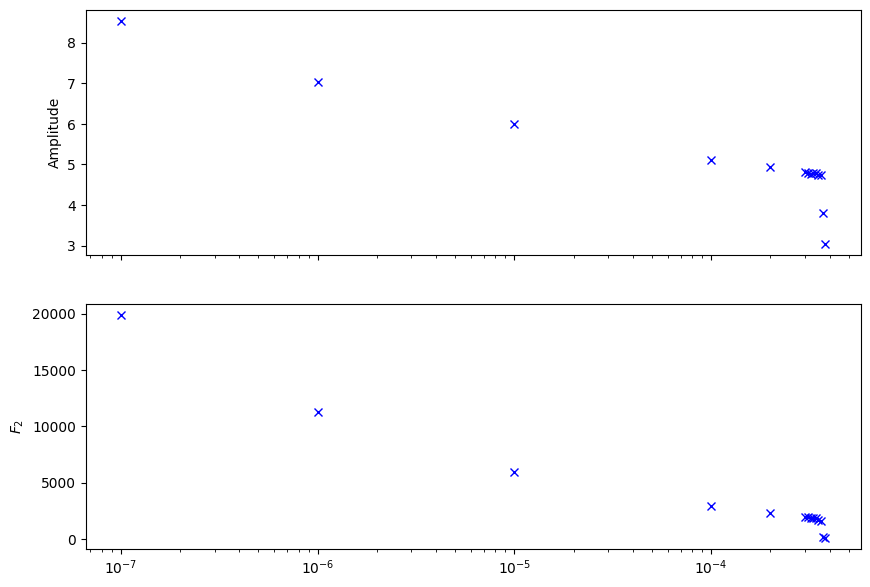

In [18]:
for pind in [0,1]:
    for itar in [0,1]:

        fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,7))

        pind, itar = 0,0

        for iw in range(len(w2_array[pind][itar])):
            ax[0].plot(w2_array[pind][itar][iw], np.amax(np.abs(results["control"][pind][itar][iw])), marker="x", color="blue")
            f2cost = np.sum(cost_functions.L2_cost(results["control"][pind][itar][iw]))
            ax[1].plot(w2_array[pind][itar][iw], f2cost, marker="x", color="blue")

        ax[0].set_xscale("log")

        ax[0].set_ylabel("Amplitude")
        ax[1].set_ylabel(r"$F_2$")

        plt.show()